In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
import numpy as np
warnings.filterwarnings('ignore')
np.seterr(all="ignore")
import pandas as pd
#matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import math 
import sklearn
import seaborn as sns
import time
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm1
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn import svm, datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
#%matplotlib widget
from sklearn.datasets import make_regression
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## Apartat B

Apliquem els models al dataset Iris. Explicació i analisi d'aquest dataset a la memoria

<IPython.core.display.Javascript object>


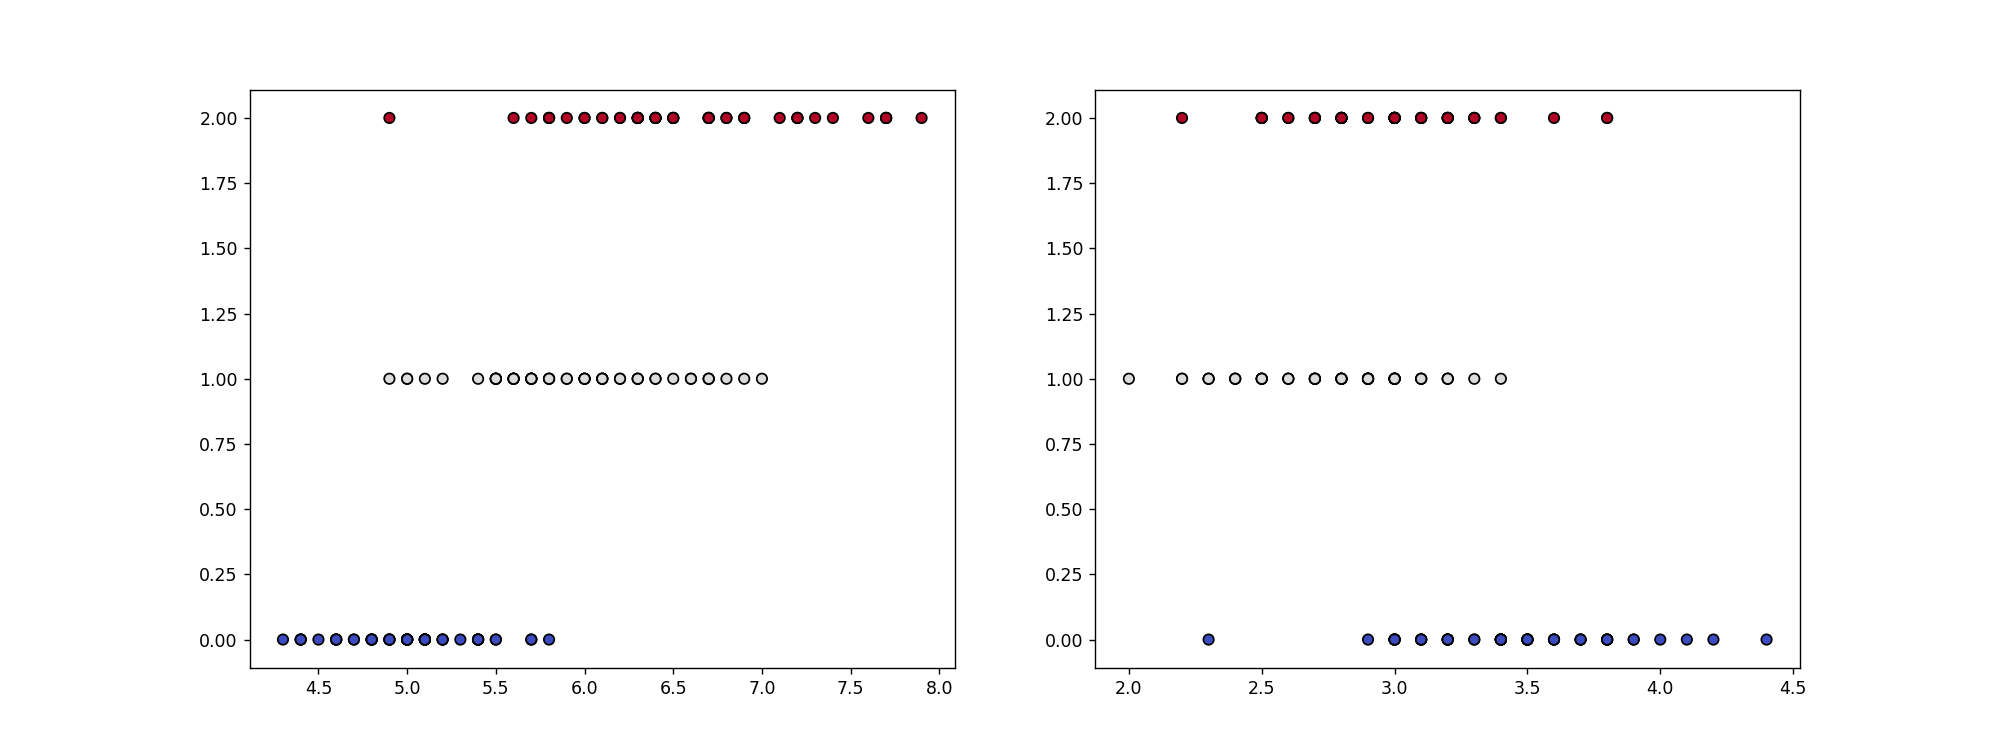

Correct classification Logistic         0.5 % of the data:  0.76
Correct classification SVM              0.5 % of the data:  0.7866666666666666
Correct classification SVML             0.5 % of the data:  0.8
Correct classification SVMP deg3        0.5 % of the data:  0.7733333333333333
Correct classification SVMP deg2        0.5 % of the data:  0.7733333333333333
Correct classification SVMS             0.5 % of the data:  0.32
Correct classification RFC              0.5 % of the data:  0.8133333333333334
Correct classification RFC etpy         0.5 % of the data:  0.8133333333333334
Correct classification KNN BT           0.5 % of the data:  0.7866666666666666
Correct classification KNN KD           0.5 % of the data:  0.7866666666666666
Correct classification KNN BRT          0.5 % of the data:  0.7466666666666667
Correct classification KNN BT wd=d      0.5 % of the data:  0.7866666666666666
Correct classification KNN KD wd=d      0.5 % of the data:  0.7866666666666666
Correct classifi

In [37]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
n_classes = 3
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]
def apply_models(particions,X,y,ret=False):

    for part in particions:
        x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)

        #Creem el regresor logístic
        logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

        # l'entrenem
        logireg.fit(x_t, y_t)
        problr = logireg.predict_proba(x_v)
        print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))

        #Creem el svm
        svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

        # l'entrenem 
        svc.fit(x_t, y_t)
        probsvc = svc.predict_proba(x_v)
        print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))

        #Creem el svm lineal
        svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

        # l'entrenem 
        svcl.fit(x_t, y_t)
        probsvcl = svcl.predict_proba(x_v)
        print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))

        #Creem el svm poly deg=3
        svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)

        # l'entrenem 
        svcp.fit(x_t, y_t)
        probsvcp = svcp.predict_proba(x_v)
        print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))

        #Creem el svm poly deg=2
        svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)

        # l'entrenem 
        svcp2.fit(x_t, y_t)
        probsvcp2 = svcp2.predict_proba(x_v)
        print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))


        #Creem el svm sigmoid
        svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

        # l'entrenem 
        svcs.fit(x_t, y_t)
        probsvcs = svcs.predict_proba(x_v)
        print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))

        #####

        #random forests gini

        clf = RandomForestClassifier(max_depth=2, random_state=0)
        clf.fit(x_t, y_t)
        probclf = clf.predict_proba(x_v)
        print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))

        #random forests entropy with n_e=1000 and md=5

        clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
        clfe.fit(x_t, y_t)
        probclfe = clfe.predict_proba(x_v)
        print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

        #####

        #KNN ball_tree

        KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
        KNNbt.fit(x_t, y_t)
        probKNNbt = KNNbt.predict_proba(x_v)
        print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))

        #KNN kd_tree

        KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
        KNNkd.fit(x_t, y_t)
        probKNNkd = KNNkd.predict_proba(x_v)
        print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))

        #KNN brute

        KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
        KNNbrt.fit(x_t, y_t)
        probKNNbrt = KNNbrt.predict_proba(x_v)
        print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))

        #####

        #KNN ball_tree weights = distance

        KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
        KNNbtwd.fit(x_t, y_t)
        probKNNbtwd = KNNbtwd.predict_proba(x_v)
        print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))

        #KNN kd_tree weights = distance

        KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
        KNNkdwd.fit(x_t, y_t)
        probKNNkdwd = KNNkdwd.predict_proba(x_v)
        print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))

        #KNN brute weights = distance

        KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
        KNNbrtwd.fit(x_t, y_t)
        probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
        print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    

        print("\n")
    if ret:
        return [problr,probsvc,probsvcl,probsvcp,probsvcp2,probsvcs,probclf,probclfe,probKNNbt,probKNNkd,probKNNbrt,probKNNbtwd,probKNNkdwd,probKNNbrtwd],x_t, x_v, y_t, y_v
probs_list,x_t, x_v, y_t, y_v=apply_models(particions,X,y,ret=True)

Observem que les millors classificacions les fan el regressor logistic i el svm amb kernel lineal.

Fem el plot de Precision-Recall and plot curve and ROC curve

problr


<IPython.core.display.Javascript object>


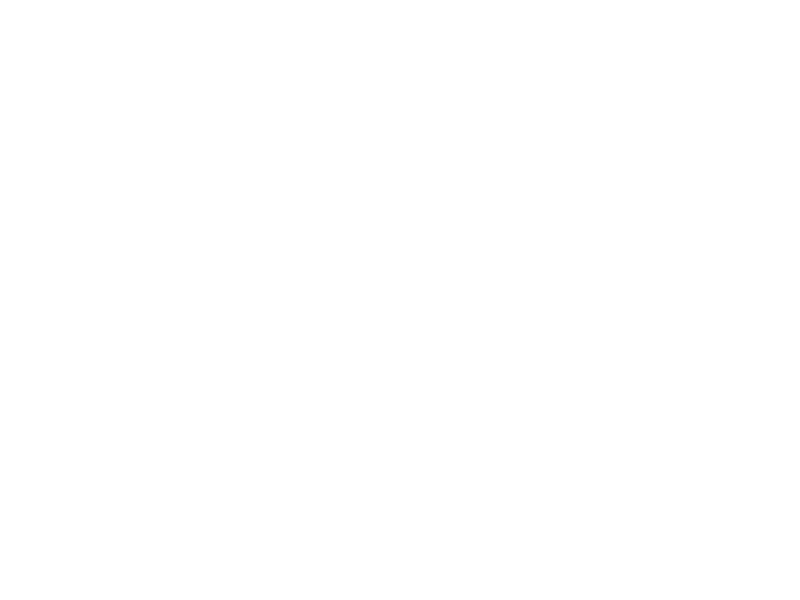

<IPython.core.display.Javascript object>


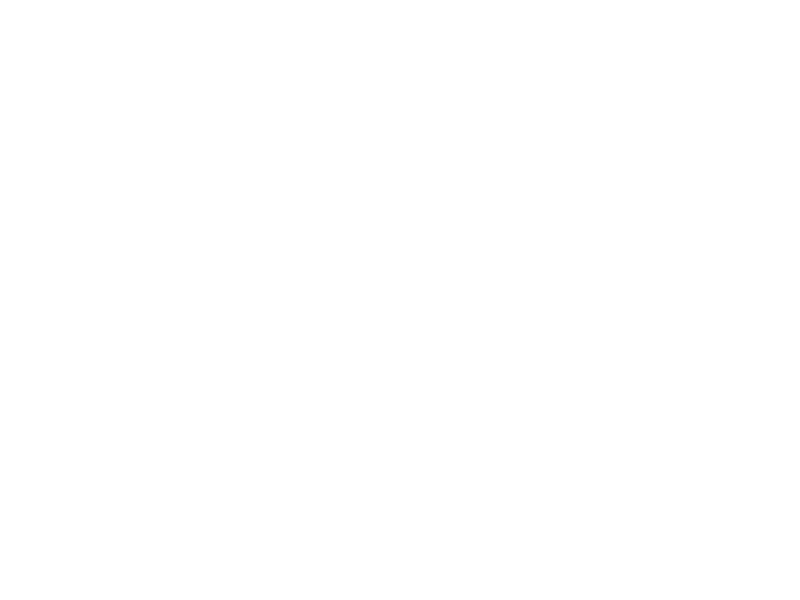

probsvc


<IPython.core.display.Javascript object>


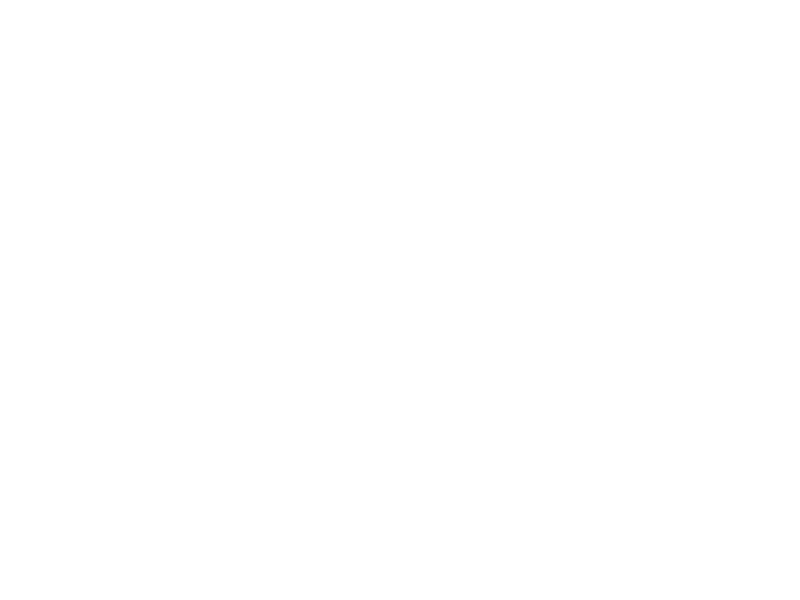

<IPython.core.display.Javascript object>


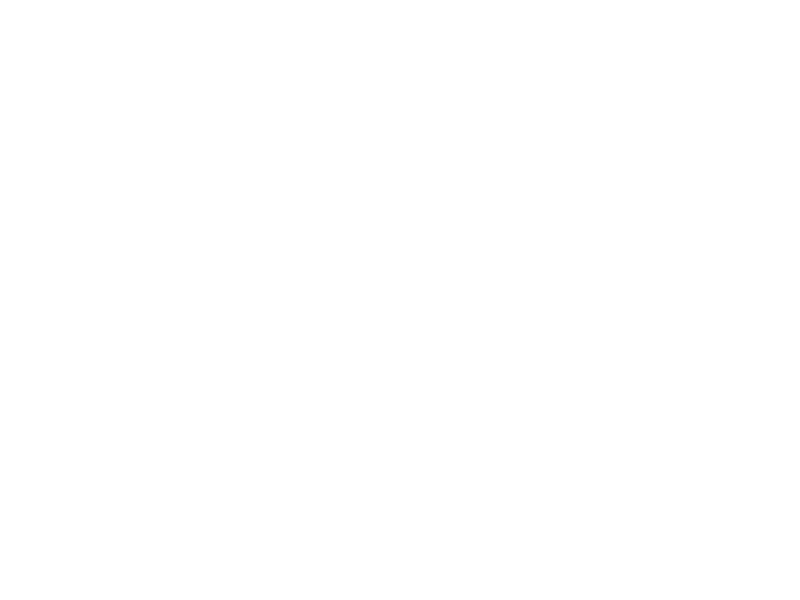

probsvcl


<IPython.core.display.Javascript object>


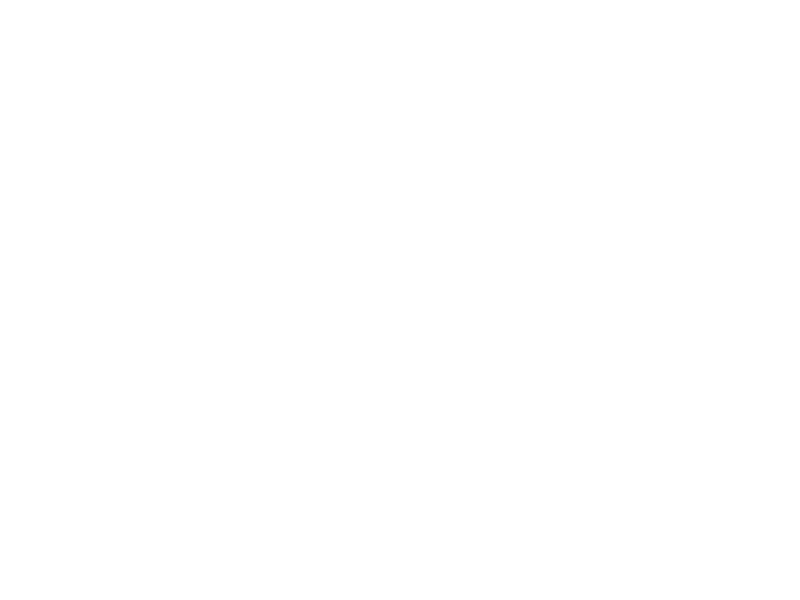

<IPython.core.display.Javascript object>


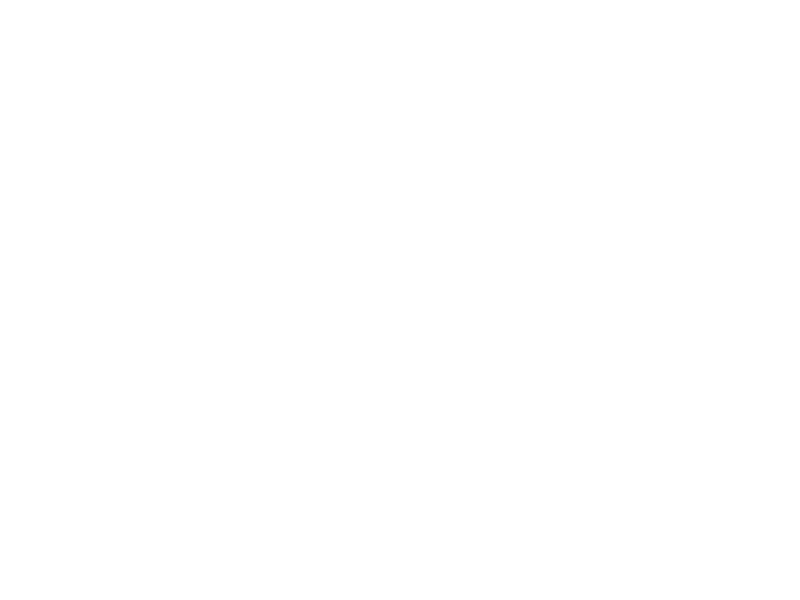

probsvcp


<IPython.core.display.Javascript object>


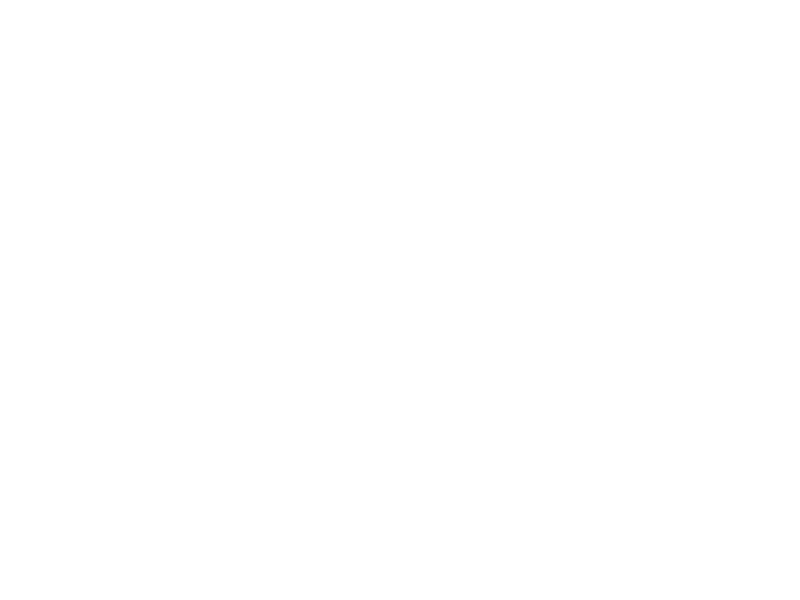

<IPython.core.display.Javascript object>


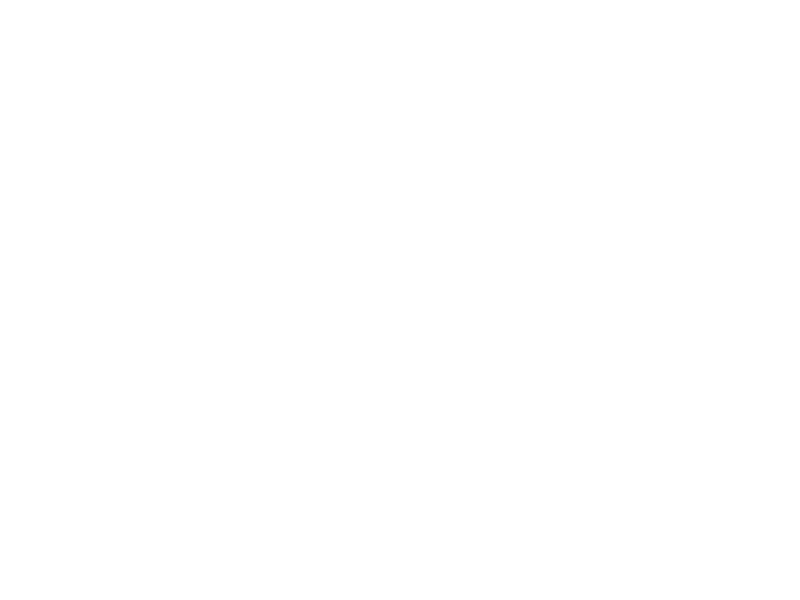

probsvcp2


<IPython.core.display.Javascript object>


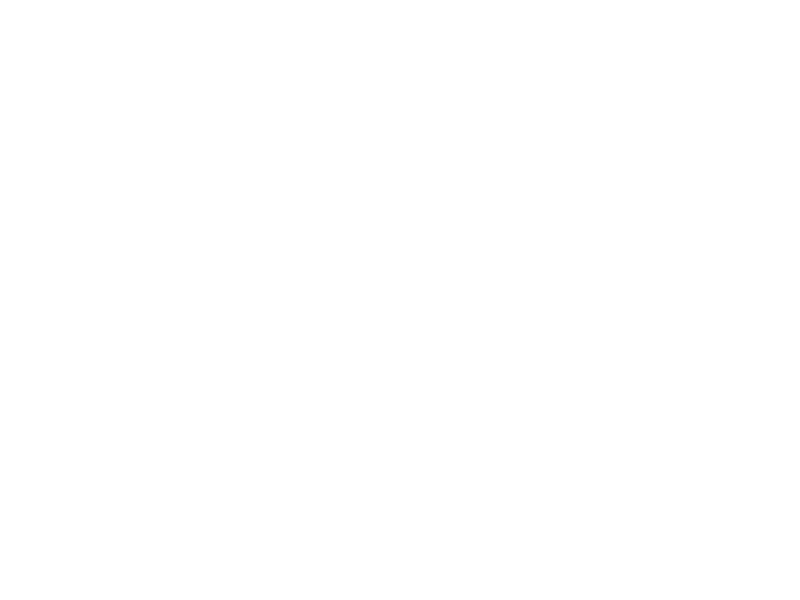

<IPython.core.display.Javascript object>


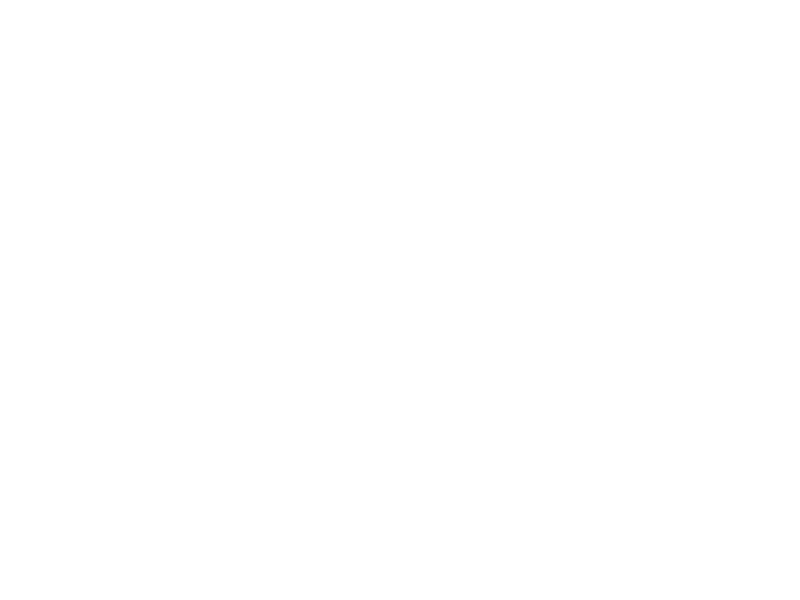

probsvcs


<IPython.core.display.Javascript object>


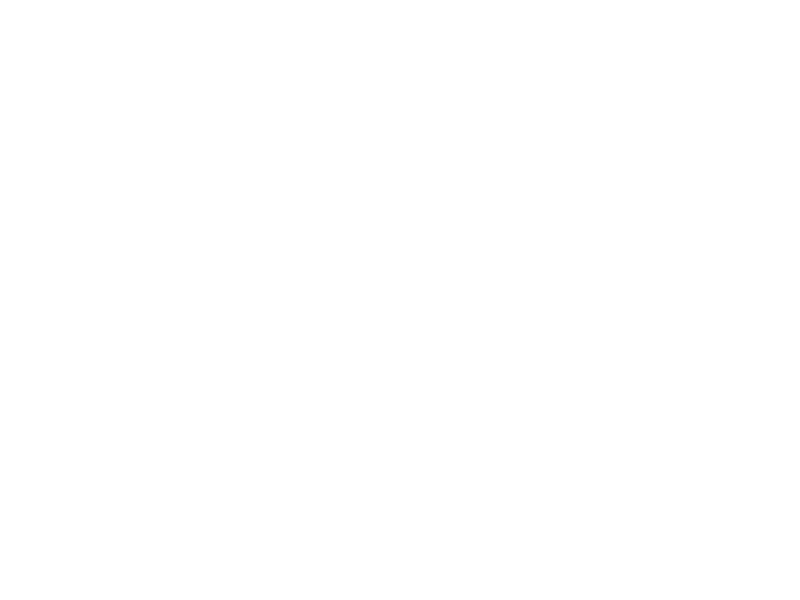

<IPython.core.display.Javascript object>


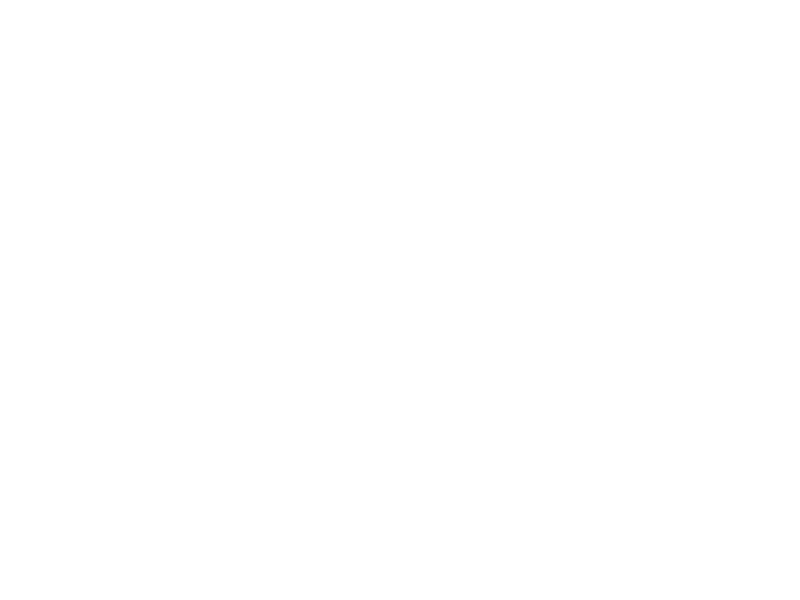

probclf


<IPython.core.display.Javascript object>


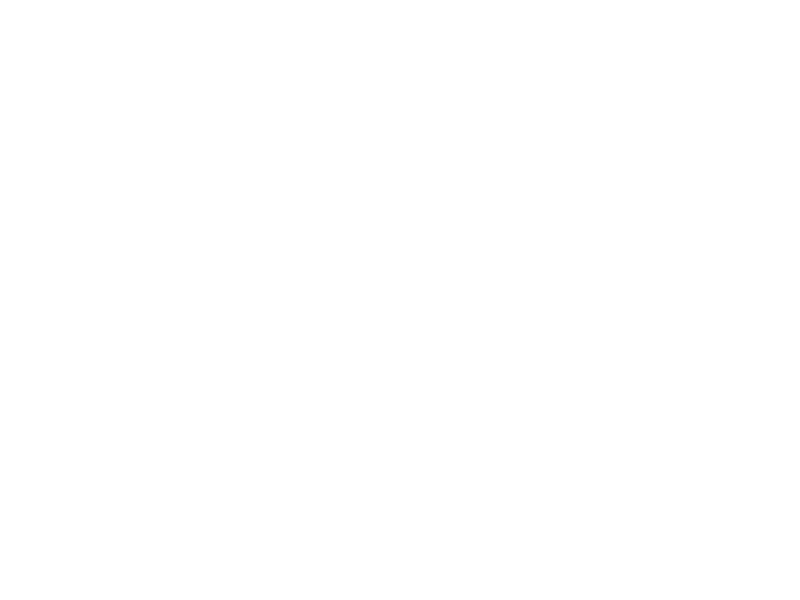

<IPython.core.display.Javascript object>


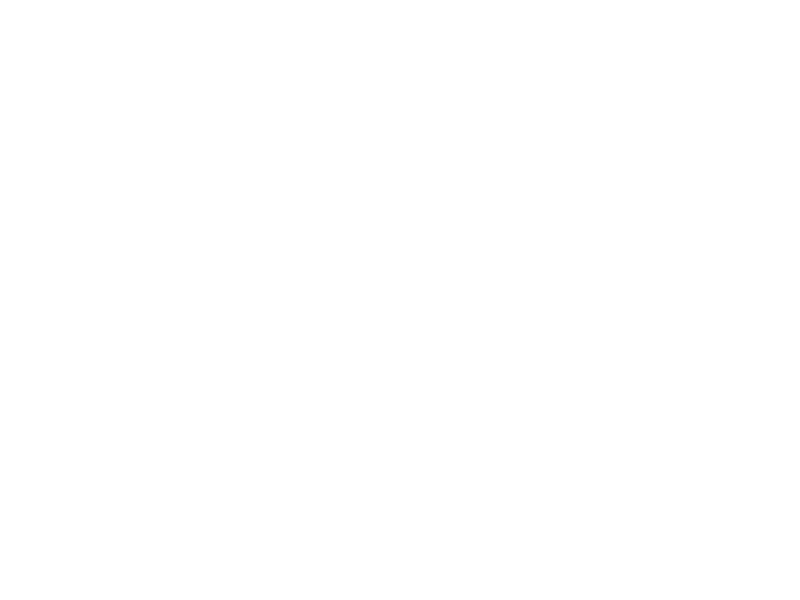

probclfe


<IPython.core.display.Javascript object>


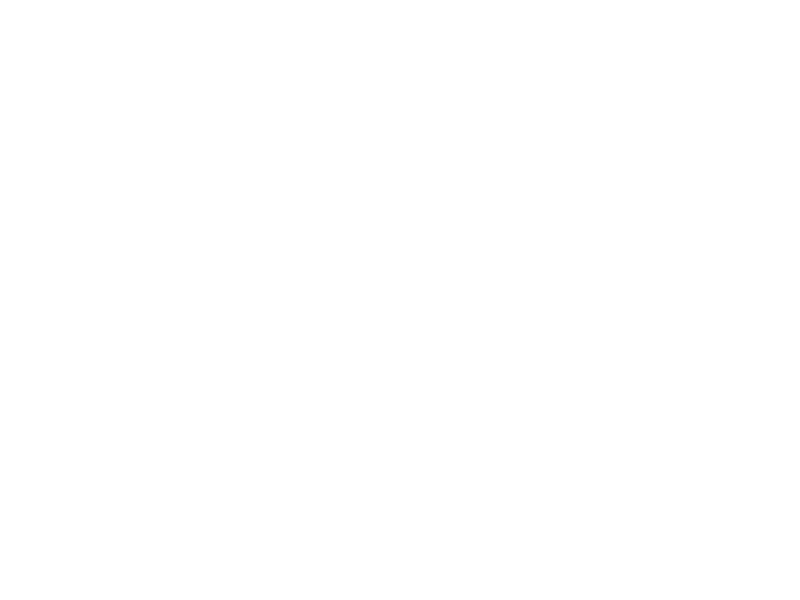

<IPython.core.display.Javascript object>


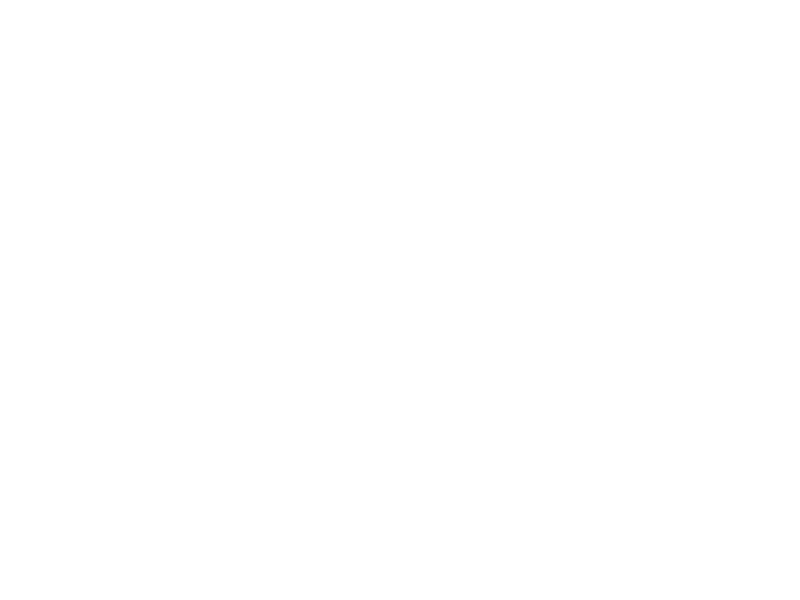

probKNNbt


<IPython.core.display.Javascript object>


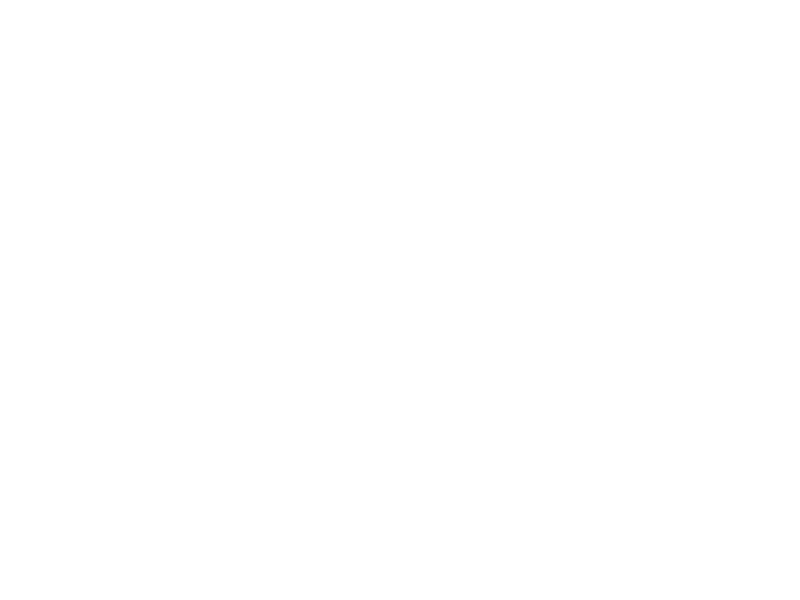

<IPython.core.display.Javascript object>


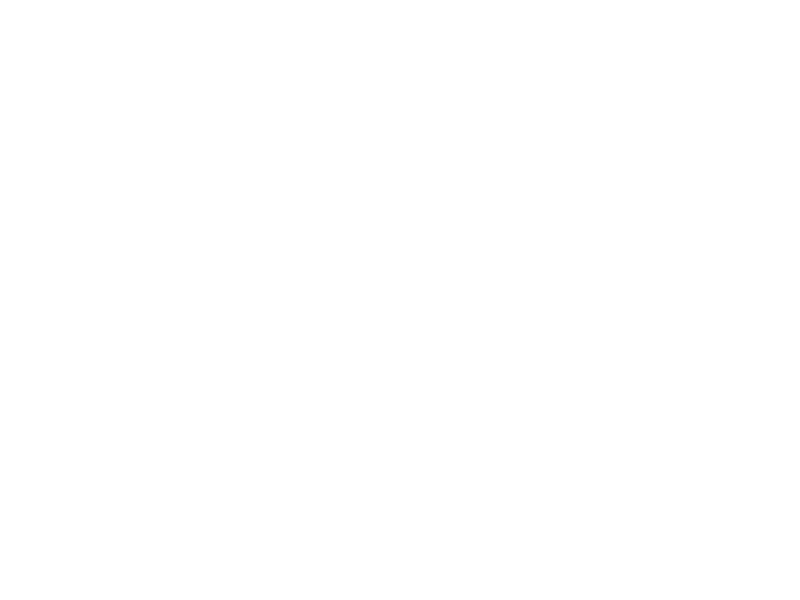

probKNNkd


<IPython.core.display.Javascript object>


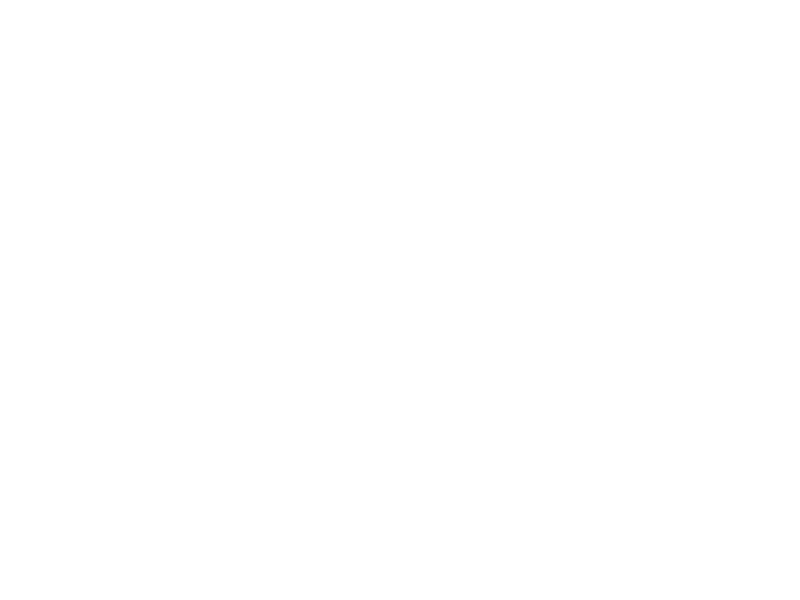

<IPython.core.display.Javascript object>


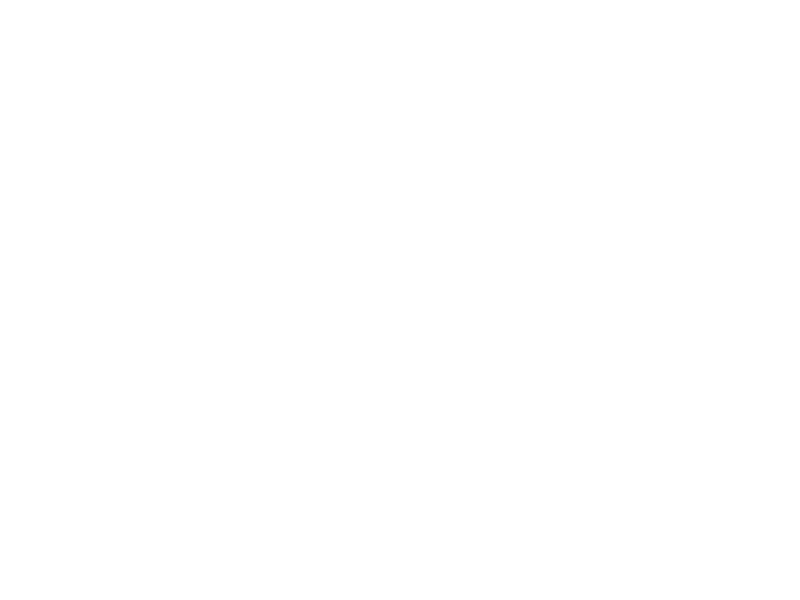

probKNNbrt


<IPython.core.display.Javascript object>


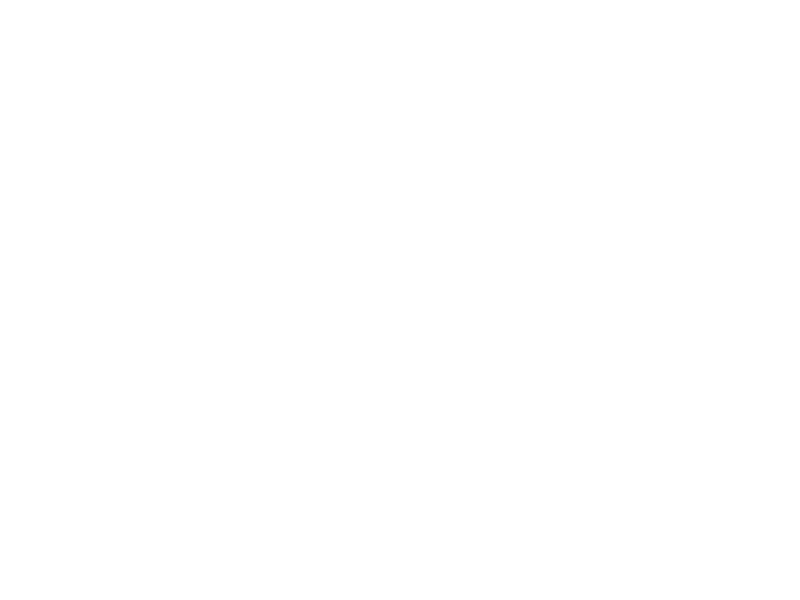

<IPython.core.display.Javascript object>


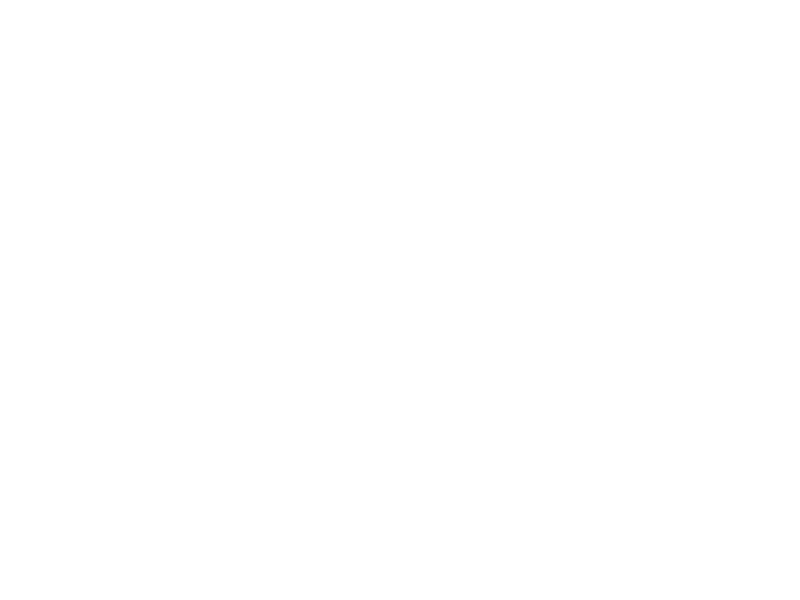

probKNNbtwd


<IPython.core.display.Javascript object>


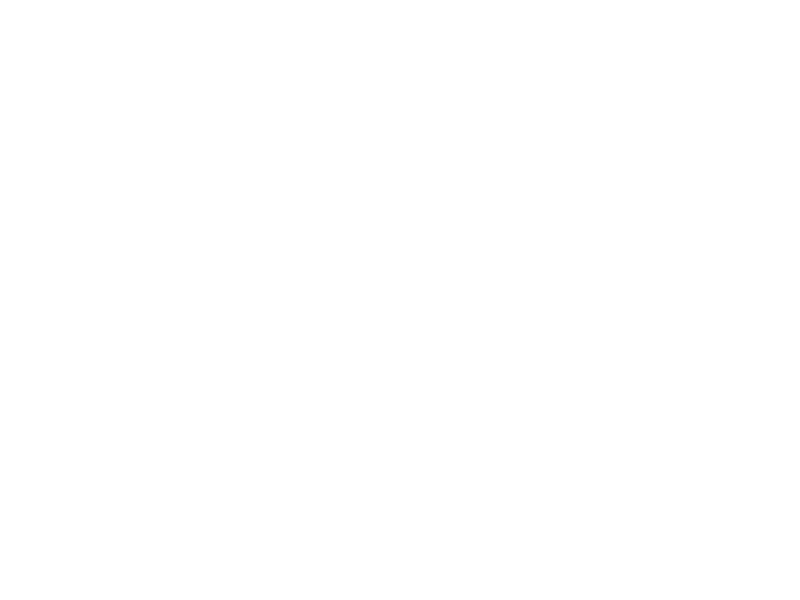

<IPython.core.display.Javascript object>


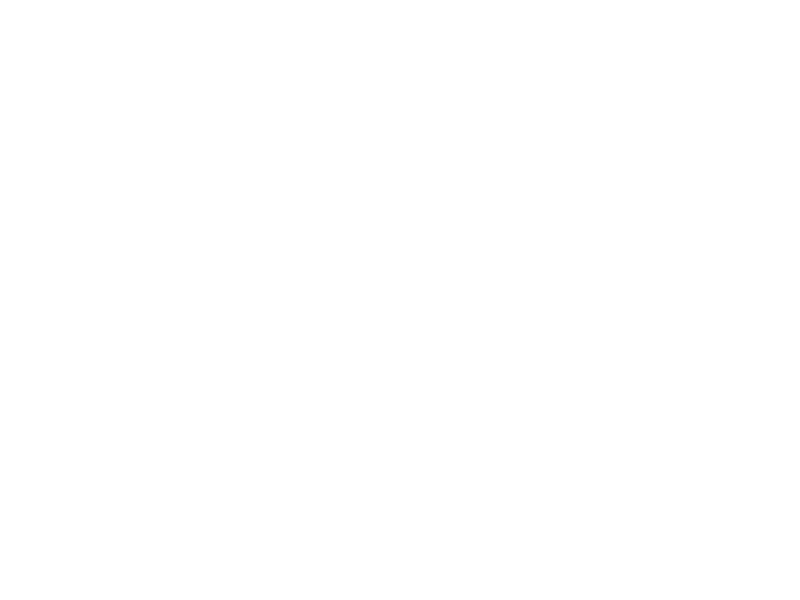

probKNNkdwd


<IPython.core.display.Javascript object>


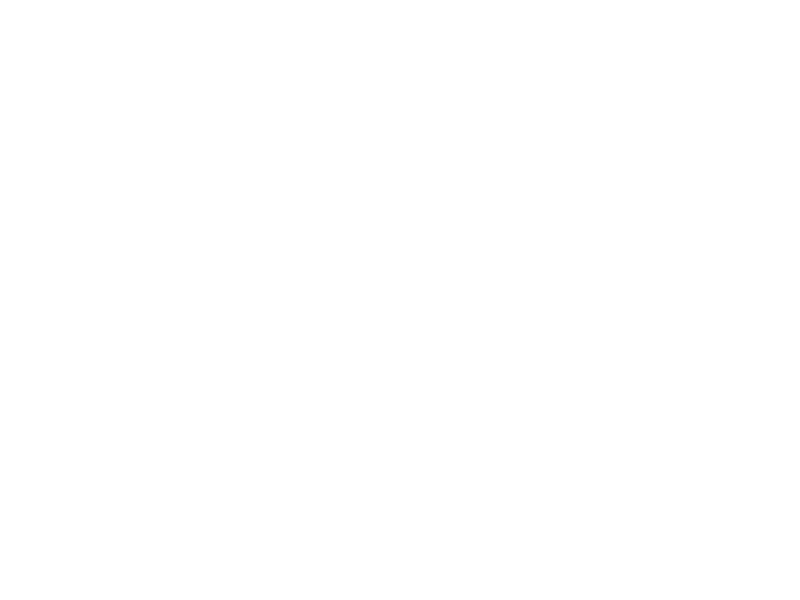

<IPython.core.display.Javascript object>


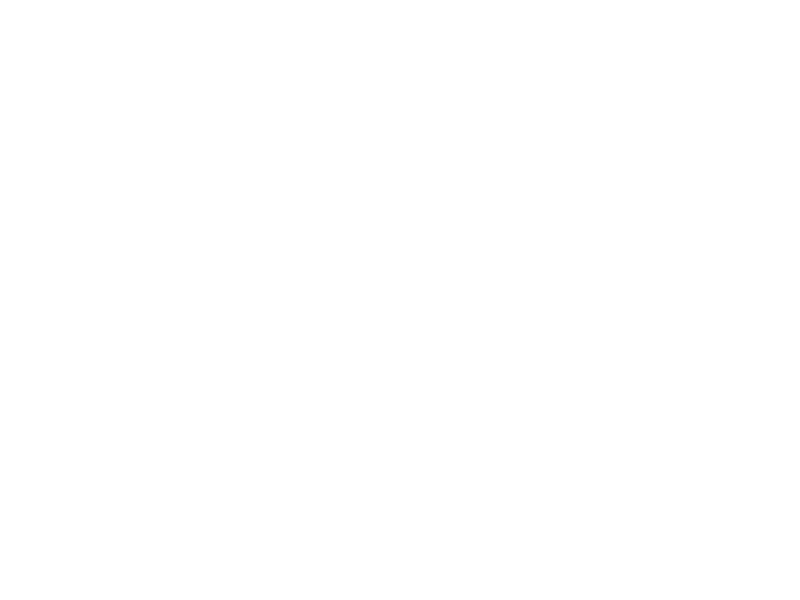

probKNNbrtwd


<IPython.core.display.Javascript object>


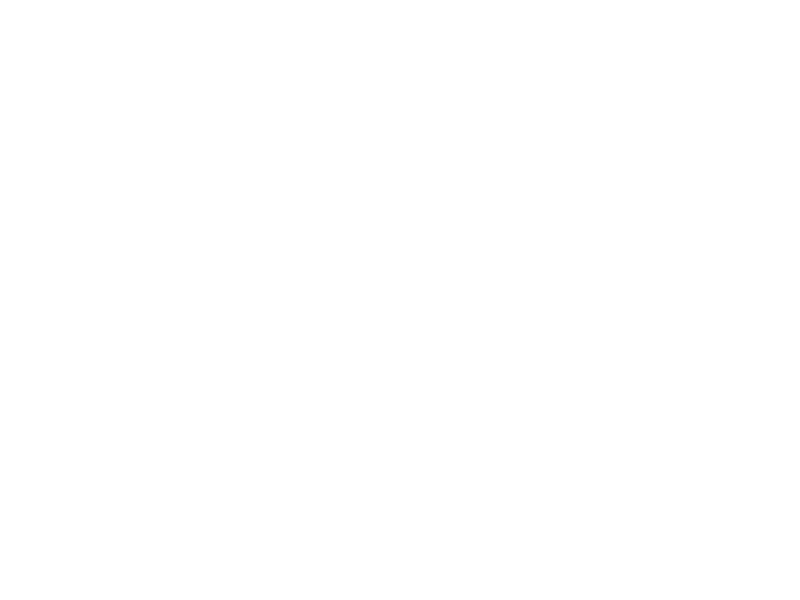

<IPython.core.display.Javascript object>


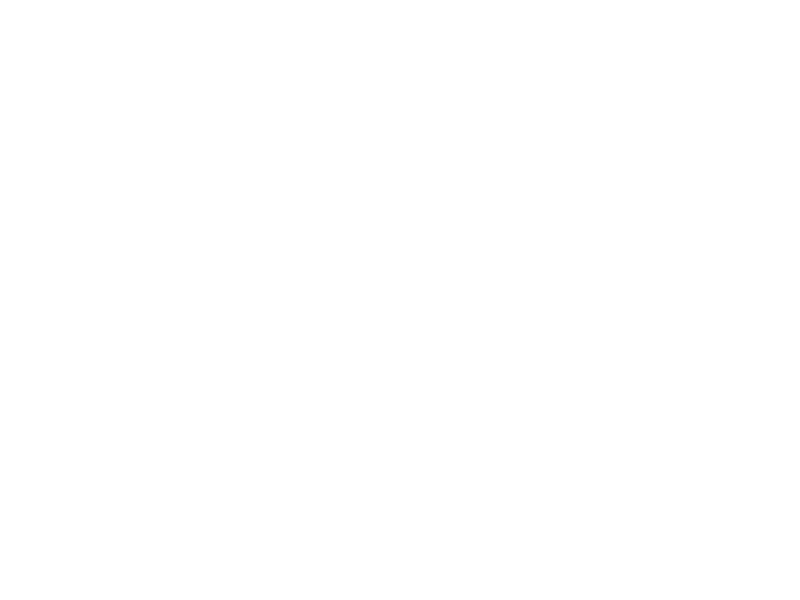

In [38]:
def compute_precision_recall(probs):
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="lower left")

def compute_ROC(probs):
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()


probs_names=["problr","probsvc","probsvcl","probsvcp","probsvcp2","probsvcs","probclf","probclfe","probKNNbt","probKNNkd","probKNNbrt","probKNNbtwd","probKNNkdwd","probKNNbrtwd"]

for i in range (len(probs_list)):
    print(probs_names[i])
    compute_precision_recall(probs_list[i])
    compute_ROC(probs_list[i])


In [39]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(X,y,names,C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    #iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X=X
    y=y
    names=names

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(names[0])
        ax.set_ylabel(names[1])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


<IPython.core.display.Javascript object>


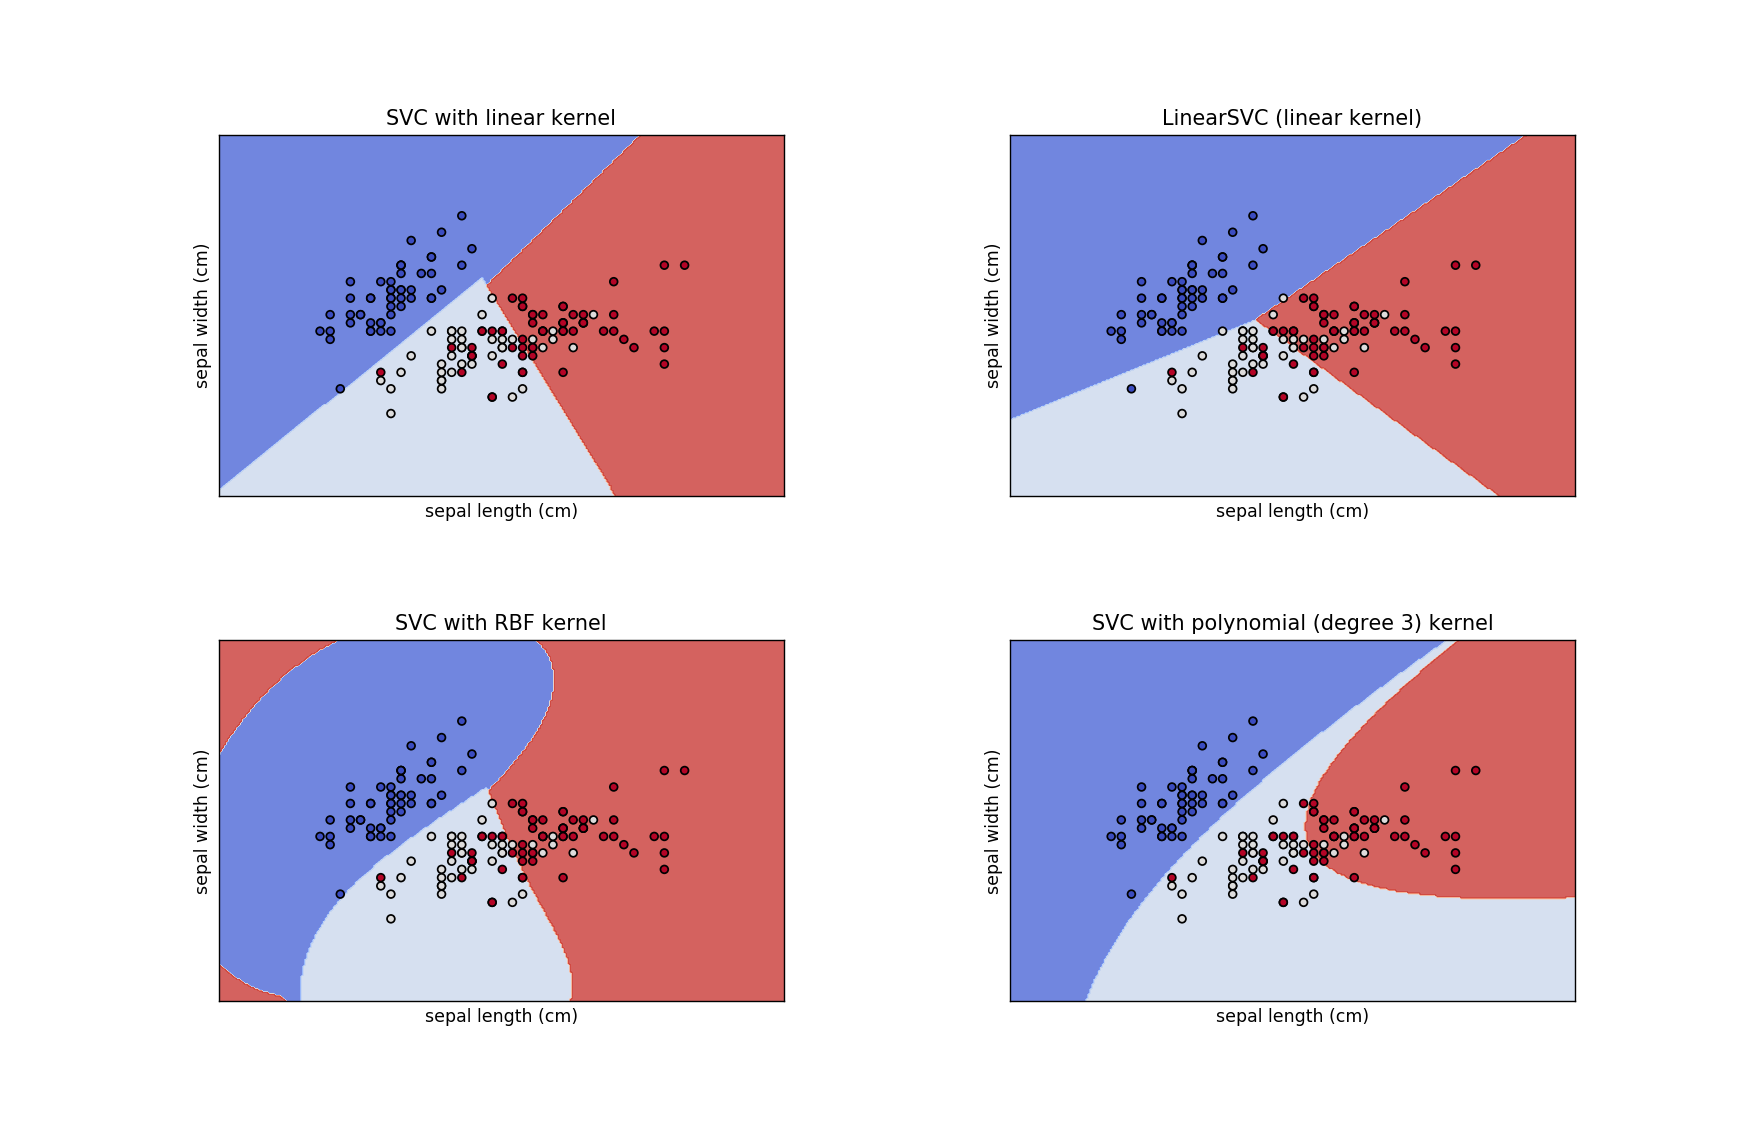

In [40]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
show_C_effect(X,y,iris.feature_names)

Fem el plot dels diferents efectes de C

<IPython.core.display.Javascript object>


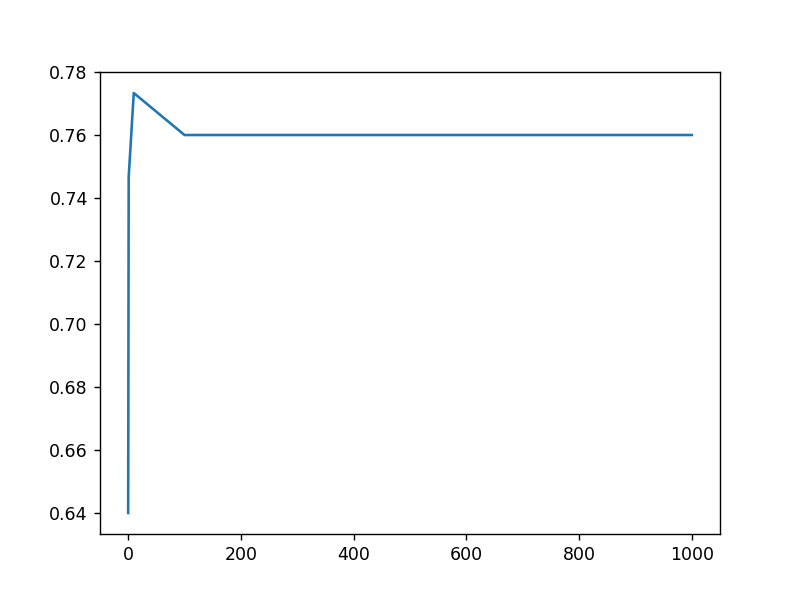

<IPython.core.display.Javascript object>


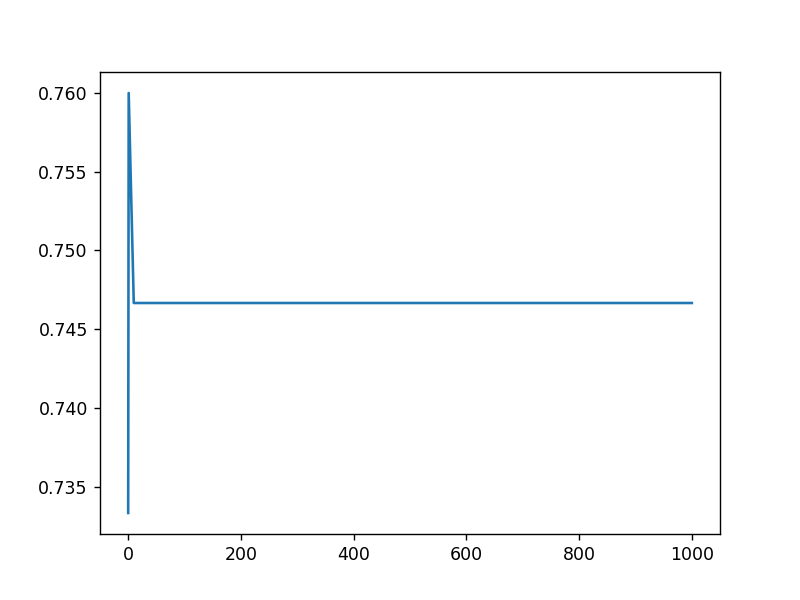

<IPython.core.display.Javascript object>


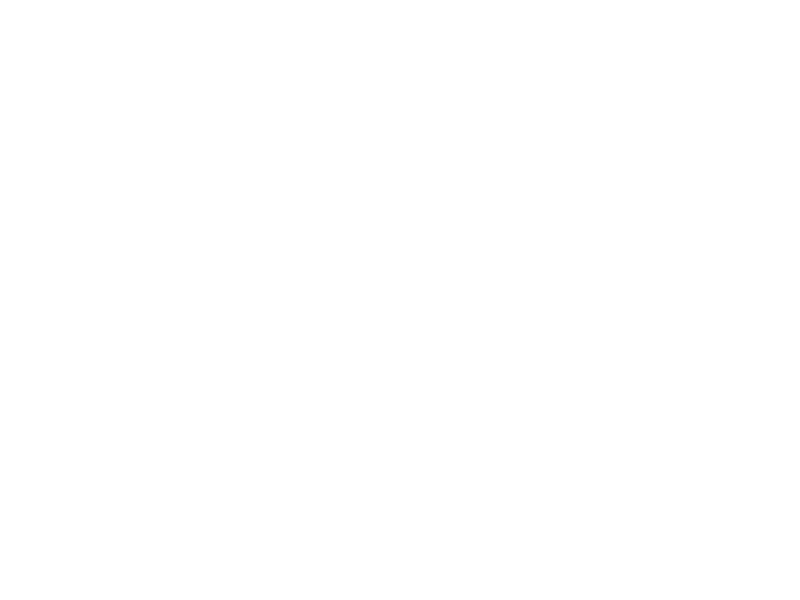

<IPython.core.display.Javascript object>


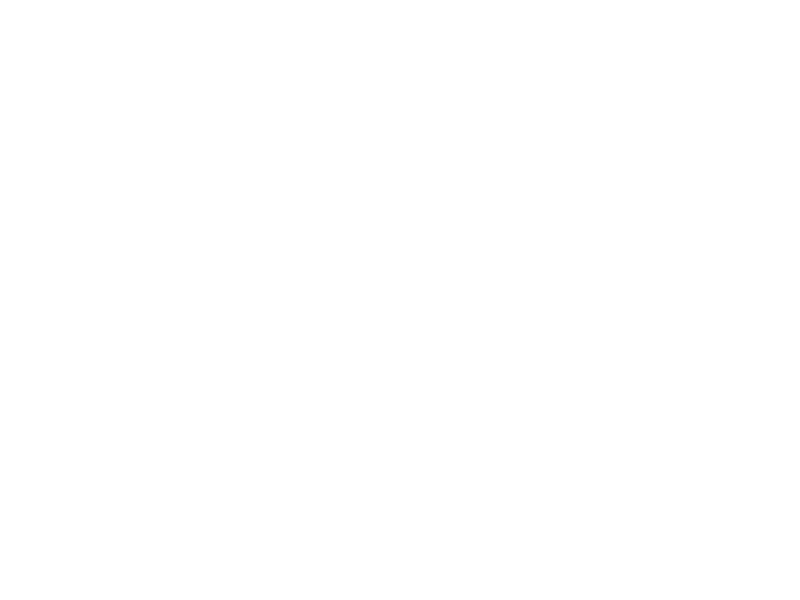

<IPython.core.display.Javascript object>


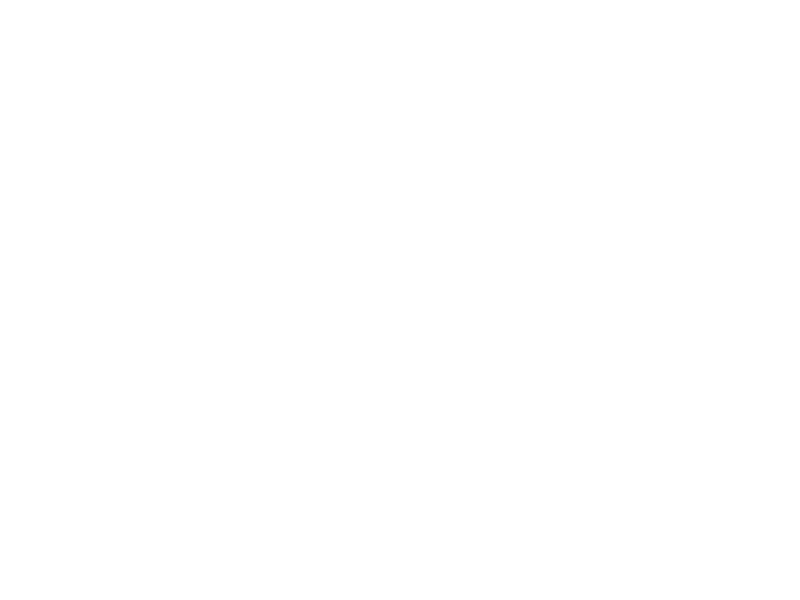

[0.6266666666666667, 0.6266666666666667, 0.6266666666666667, 0.6266666666666667, 0.6266666666666667]


In [41]:
part=0.5
gamma=0.7
degree=3
CS=[0.1,1,10,100,1000]
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
scores=[]
for C in CS:
    svc = LogisticRegression(C=C, fit_intercept=True, penalty='l2', tol=0.001)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svc = svm.SVC(kernel='linear', C=C)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)


scores=[]
for C in CS:
    svc = svm.LinearSVC(C=C, max_iter=1000000)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svc = svm.SVC(C=C, kernel='rbf', gamma=gamma)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C)
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)
print(scores)


## Apartat A

Carreguem el dataset i comprovem els nulls

In [42]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',',decimal='.')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('pokemon1.csv')
data = dataset.values
dataset.isnull().sum() 

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


Apliquem diferents canvis al dataset 

In [43]:
dataset["type2"][dataset["type2"].isna()]=dataset["type1"][dataset["type2"].isna()]
dataset=dataset.drop(["name","japanese_name","pokedex_number","percentage_male","abilities","classfication"],axis=1)
label_encoder = sklearn.preprocessing.LabelEncoder() 
dataset['type1'] = label_encoder.fit_transform(dataset['type1'])
dataset['type2'] = label_encoder.fit_transform(dataset['type2'])

In [44]:
correlacio = dataset.corr()
#En cas de voler veure un heatmap de la correlacio, descomentar les següents linies
#plt.figure()
#ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
#relacio = sns.pairplot(dataset)

Observem les correlacions de la variable que volem predir(is_legendary)

In [45]:
correlacio["is_legendary"]

against_bug          0.028
against_dark         0.136
against_dragon       0.015
against_electric    -0.023
against_fairy        0.050
against_fight       -0.059
against_fire        -0.011
against_flying      -0.062
against_ghost        0.171
against_grass       -0.071
against_ground       0.013
against_ice          0.006
against_normal      -0.035
against_poison      -0.024
against_psychic     -0.106
against_rock        -0.018
against_steel        0.001
against_water       -0.021
attack               0.303
base_egg_steps       0.873
base_happiness      -0.413
base_total           0.485
capture_rate        -0.328
defense              0.266
experience_growth    0.361
height_m             0.318
hp                   0.308
sp_attack            0.406
sp_defense           0.343
speed                0.312
type1                0.018
type2               -0.000
weight_kg            0.387
generation           0.139
is_legendary         1.000
Name: is_legendary, dtype: float64

Separem la variable que volem predir i normalitzem

In [46]:
y = dataset.filter(['is_legendary'])
X =dataset.drop(['is_legendary'],axis=1)
X=(X-X.mean())/X.std()

In [47]:
X.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation'],
      dtype='object')

Apliquem feture selection 

In [48]:

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2,random_state =42)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, np.ravel(Y_train.values,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 34
selected features: 18
features with coefficients shrank to zero: 16


In [49]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
X_train.shape, X_test.shape

((640, 18), (161, 18))

In [50]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(X_train, np.ravel(Y_train,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(selected_feat)
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 18
selected features: 6
Int64Index([0, 3, 7, 9, 10, 11], dtype='int64')
features with coefficients shrank to zero: 0


In [51]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
print(removed_feats)
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)
X_train_selected.shape, X_test_selected.shape

Int64Index([], dtype='int64')


((640, 6), (161, 6))

In [52]:
x_selected= np.concatenate((X_train_selected, X_test_selected))
y_selected=np.concatenate((Y_train, Y_test))

Apliquem models amb les features seleccionades

In [53]:
particions = [0.5, 0.7, 0.8]
probs_list,x_t, x_v, y_t, y_v=apply_models(particions,x_selected,y_selected,ret=True)

Correct classification Logistic         0.5 % of the data:  0.9875311720698254
Correct classification SVM              0.5 % of the data:  0.9850374064837906
Correct classification SVML             0.5 % of the data:  0.9800498753117207
Correct classification SVMP deg3        0.5 % of the data:  0.9950124688279302
Correct classification SVMP deg2        0.5 % of the data:  0.9900249376558603
Correct classification SVMS             0.5 % of the data:  0.8678304239401496
Correct classification RFC              0.5 % of the data:  0.9875311720698254
Correct classification RFC etpy         0.5 % of the data:  0.9975062344139651
Correct classification KNN BT           0.5 % of the data:  0.9850374064837906
Correct classification KNN KD           0.5 % of the data:  0.9850374064837906
Correct classification KNN BRT          0.5 % of the data:  0.9850374064837906
Correct classification KNN BT wd=d      0.5 % of the data:  0.9900249376558603
Correct classification KNN KD wd=d      0.5 % of the

Visulaitzem els resultats

problr


<IPython.core.display.Javascript object>


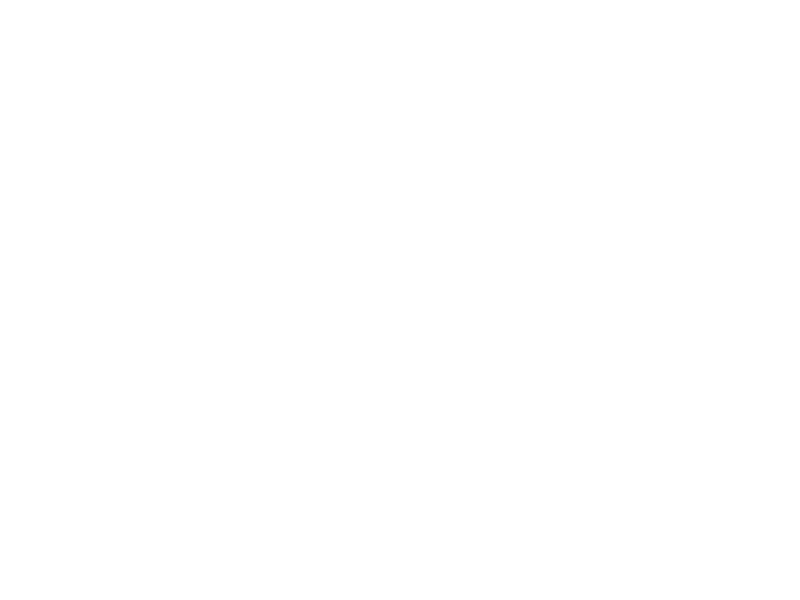

<IPython.core.display.Javascript object>


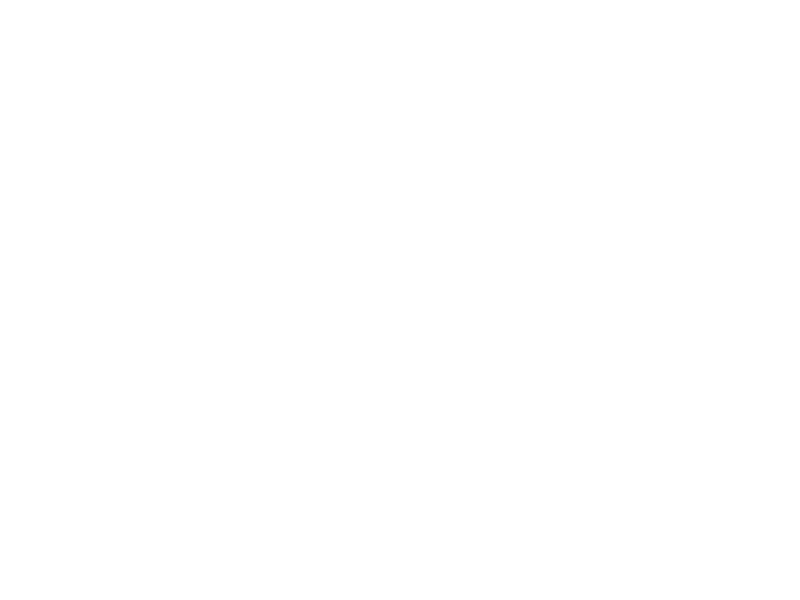

probsvc


<IPython.core.display.Javascript object>


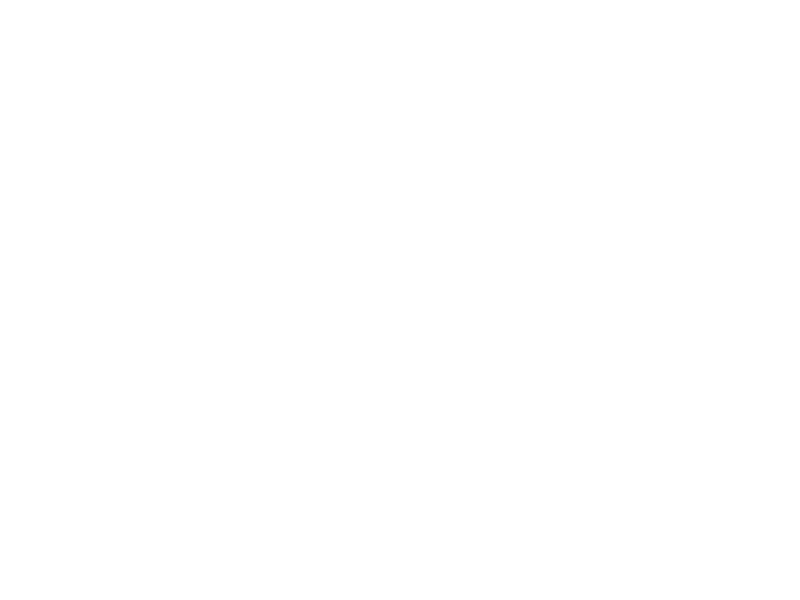

<IPython.core.display.Javascript object>


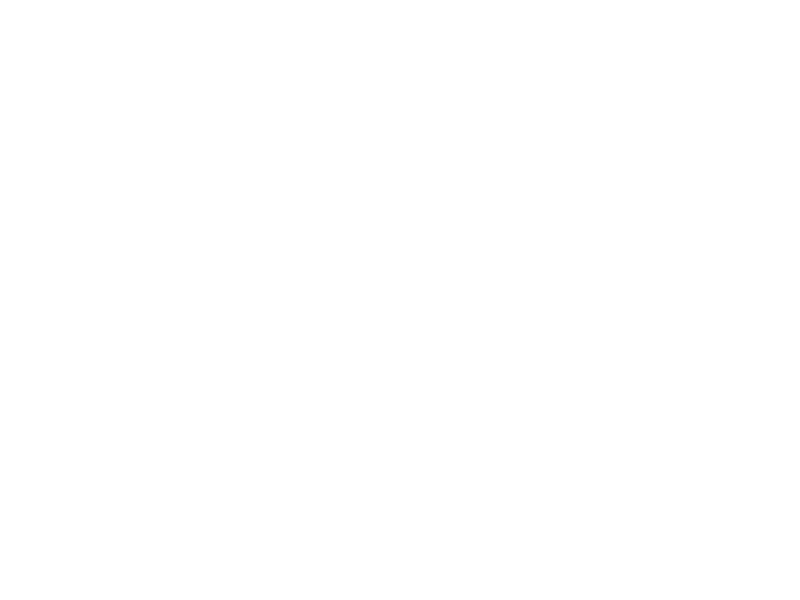

probsvcl


<IPython.core.display.Javascript object>


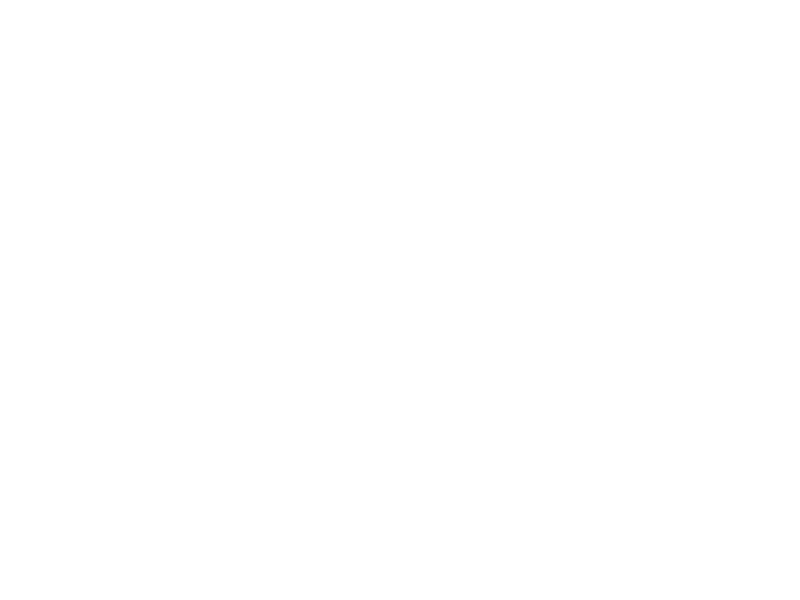

<IPython.core.display.Javascript object>


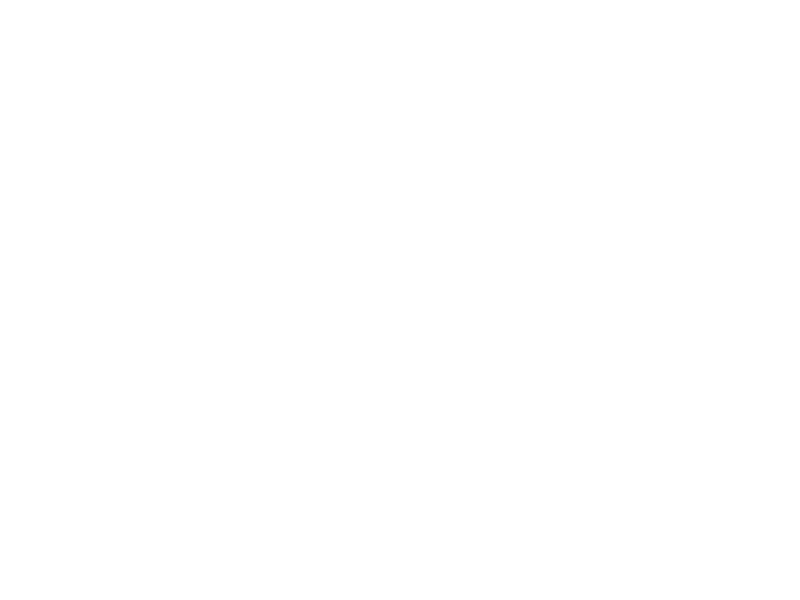

probsvcp


<IPython.core.display.Javascript object>


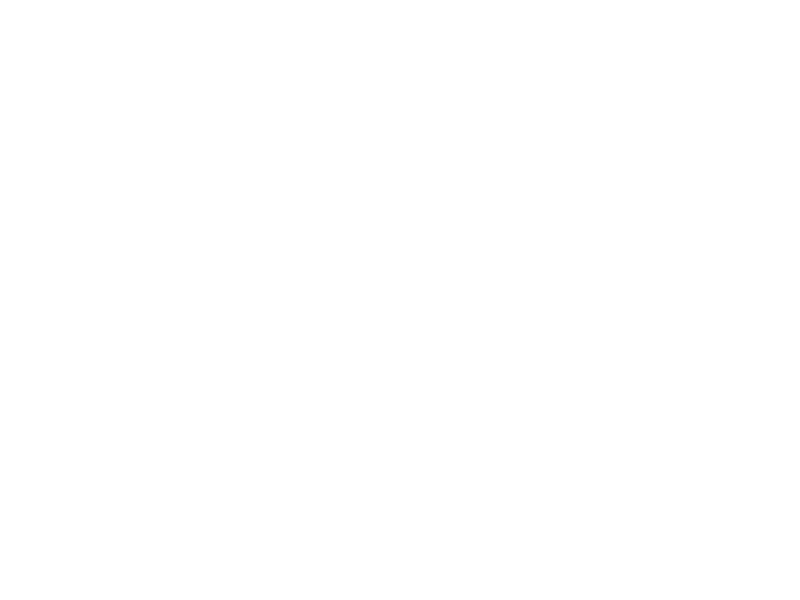

<IPython.core.display.Javascript object>


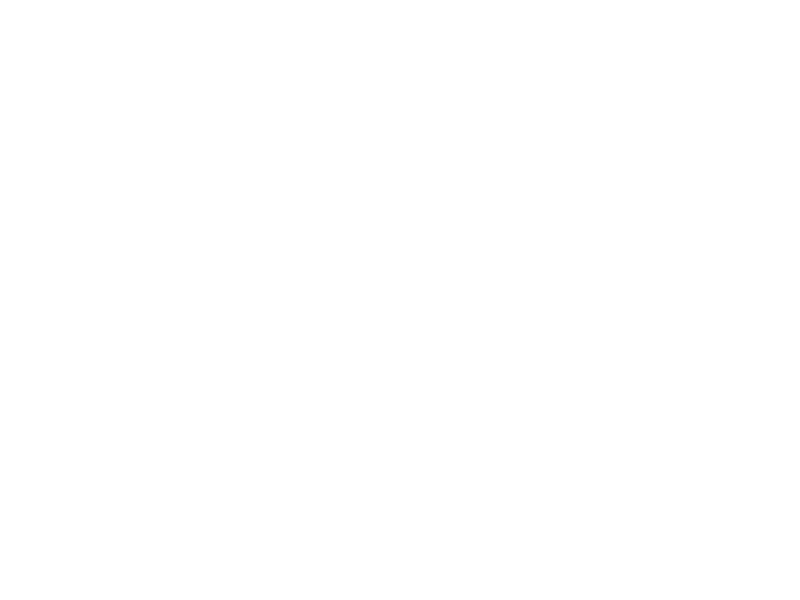

probsvcp2


<IPython.core.display.Javascript object>


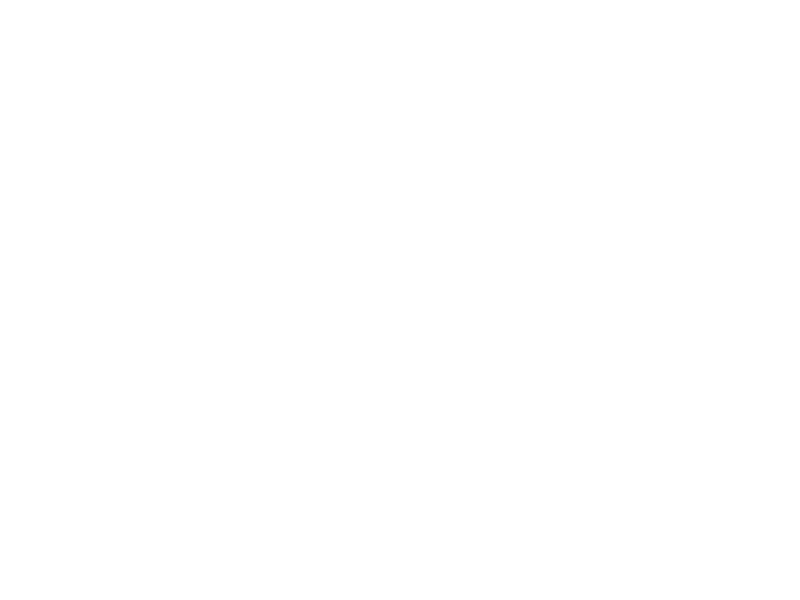

<IPython.core.display.Javascript object>


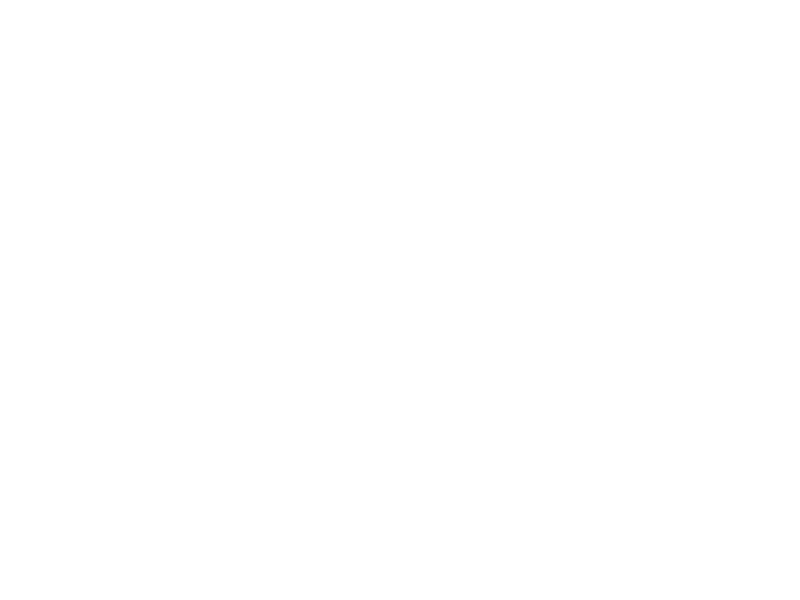

probsvcs


<IPython.core.display.Javascript object>


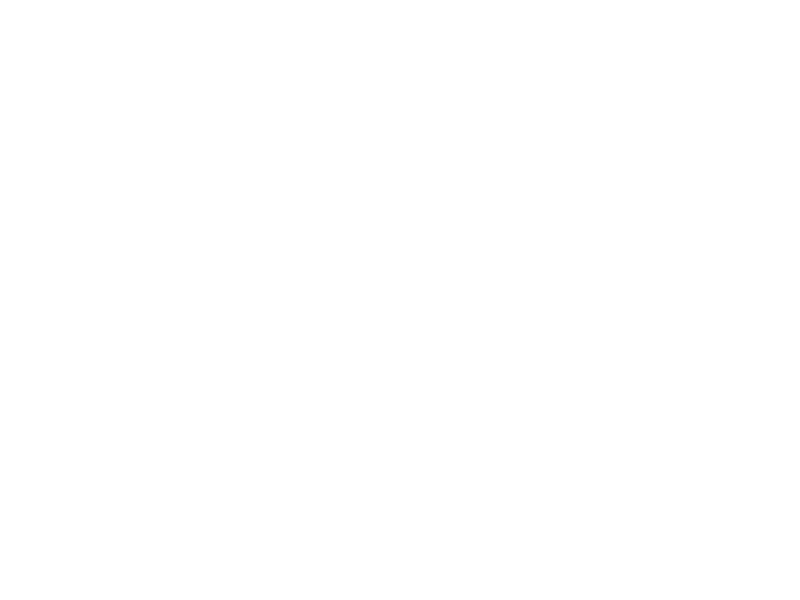

<IPython.core.display.Javascript object>


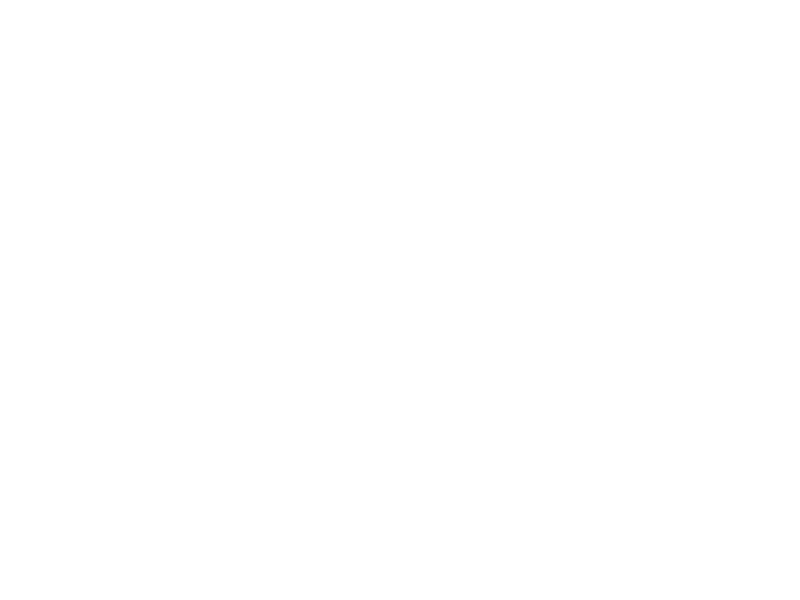

probclf


<IPython.core.display.Javascript object>


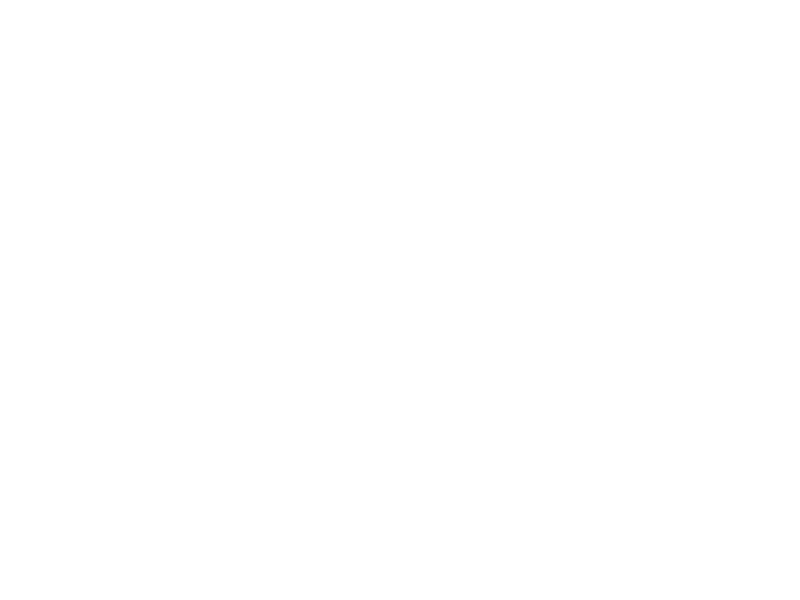

<IPython.core.display.Javascript object>


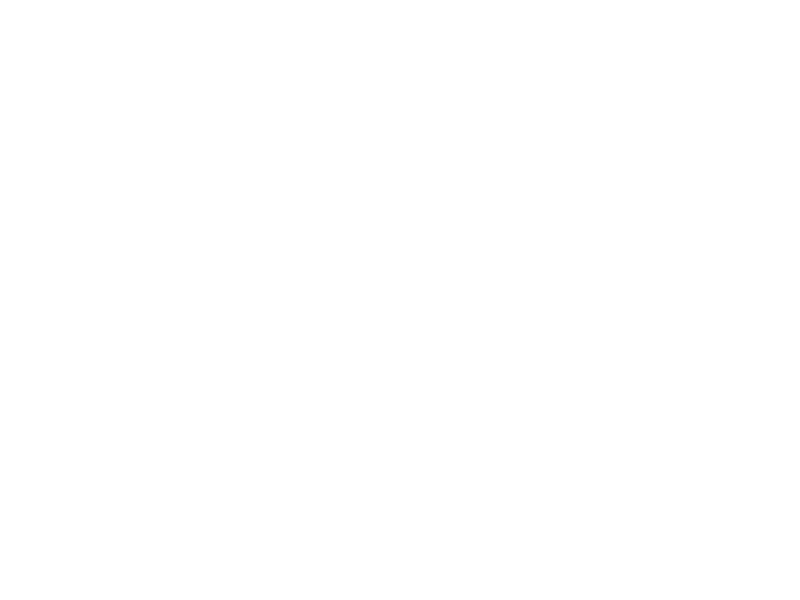

probclfe


<IPython.core.display.Javascript object>


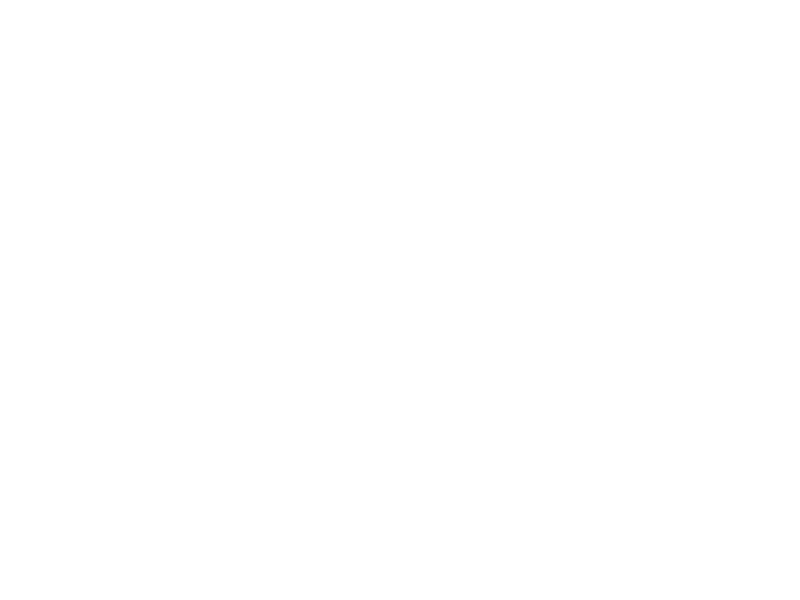

<IPython.core.display.Javascript object>


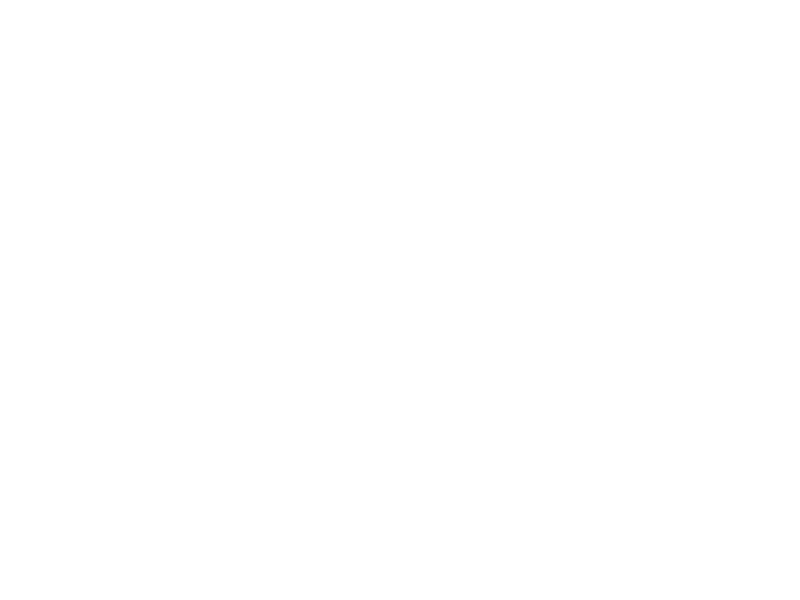

probKNNbt


<IPython.core.display.Javascript object>


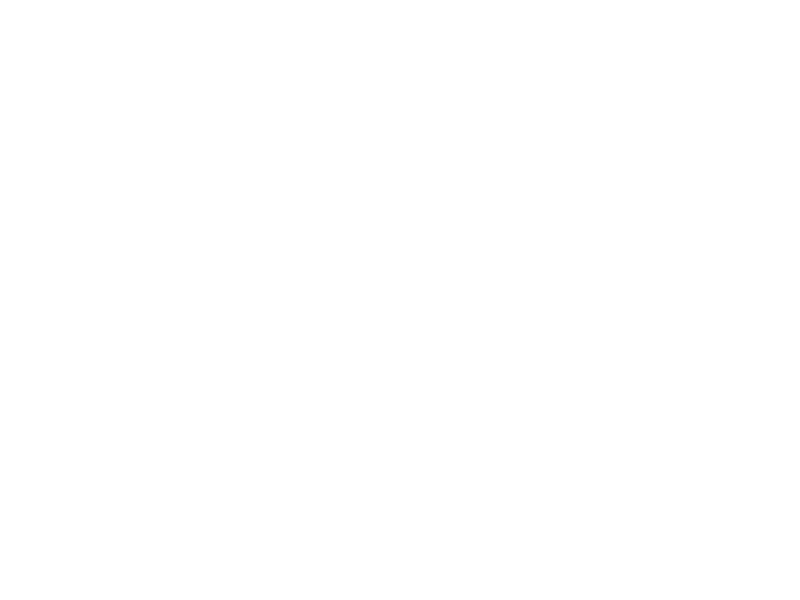

<IPython.core.display.Javascript object>


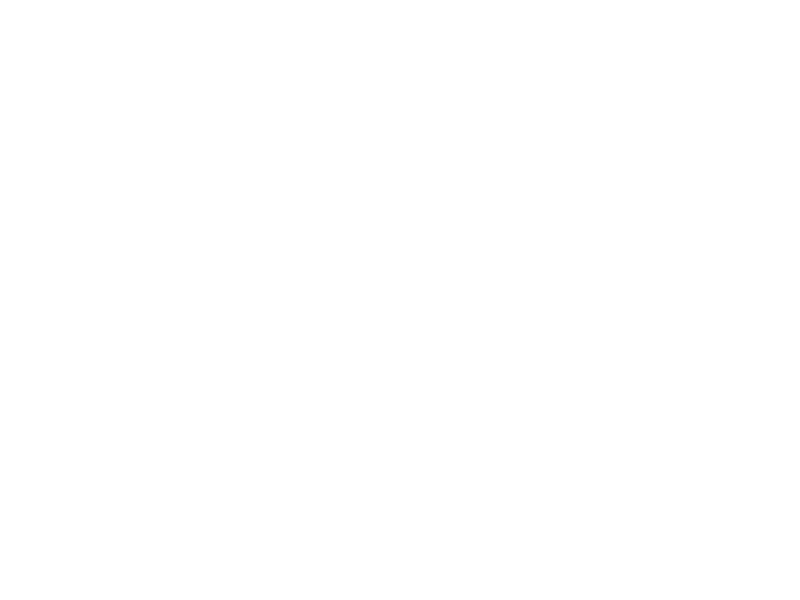

probKNNkd


<IPython.core.display.Javascript object>


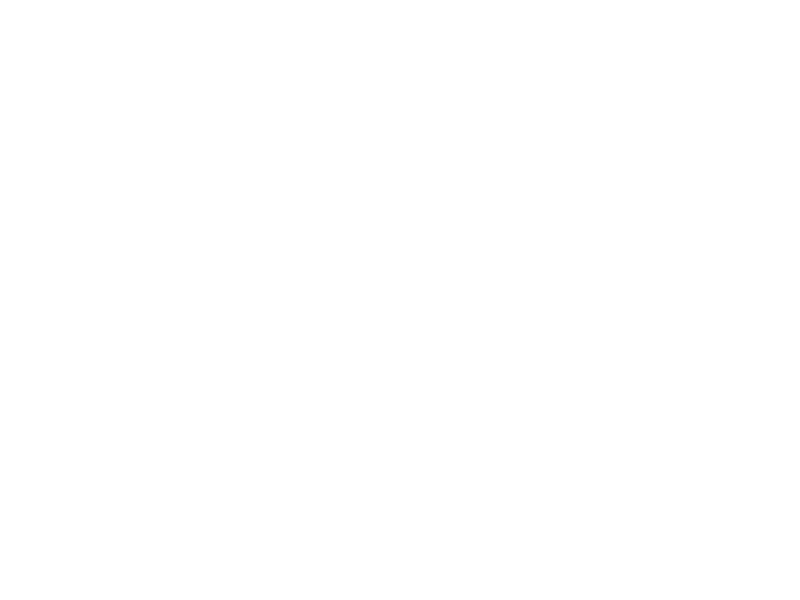

<IPython.core.display.Javascript object>


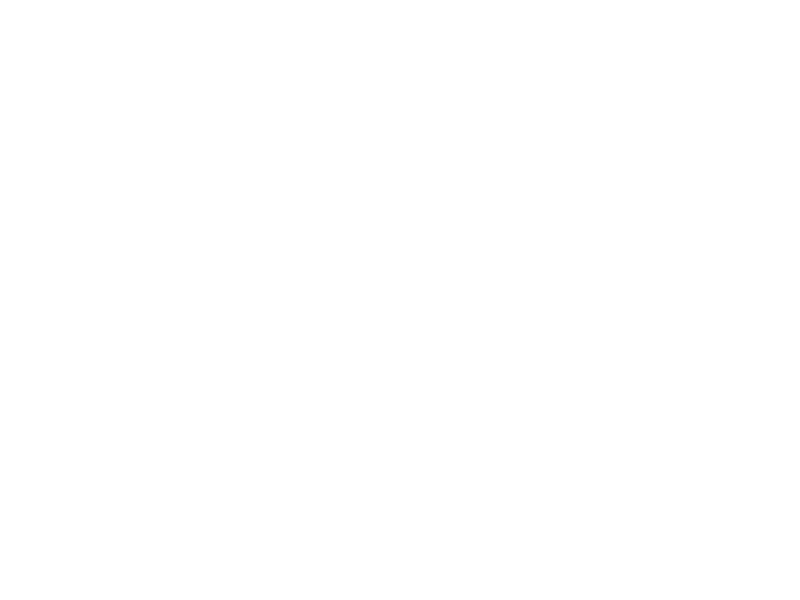

probKNNbrt


<IPython.core.display.Javascript object>


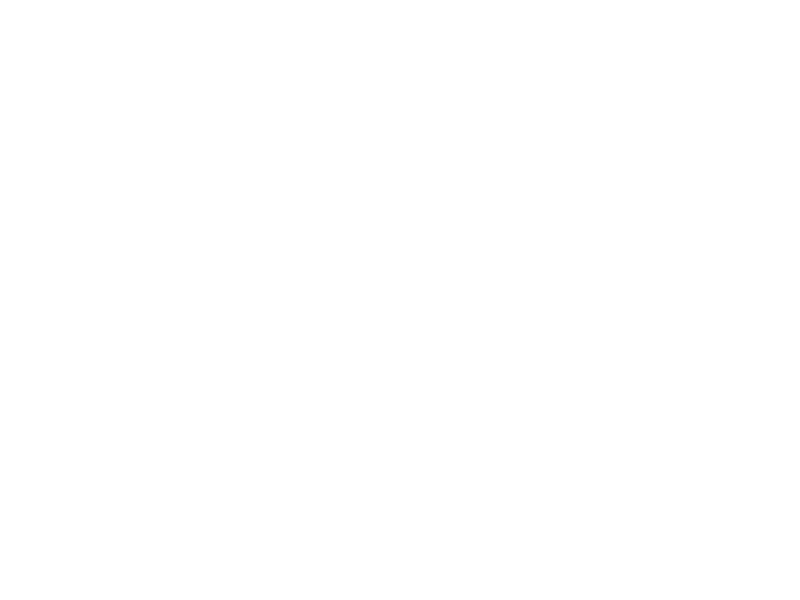

<IPython.core.display.Javascript object>


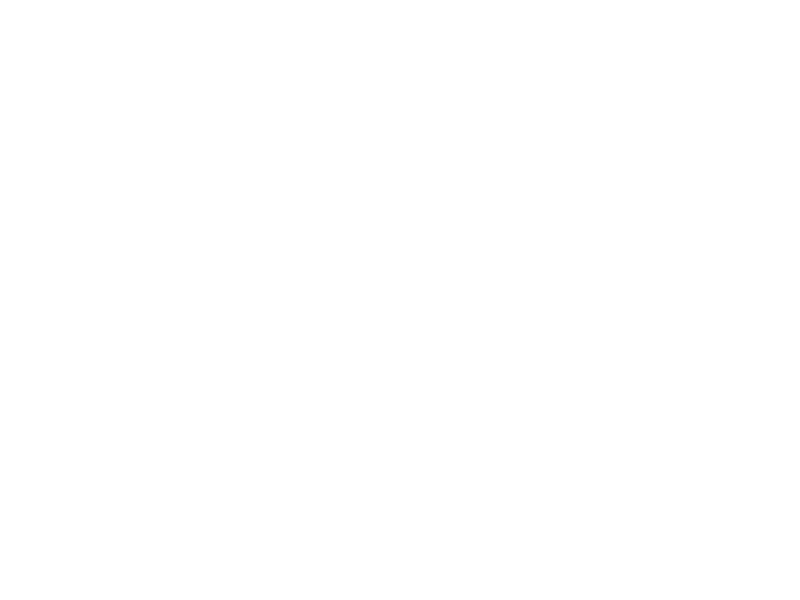

probKNNbtwd


<IPython.core.display.Javascript object>


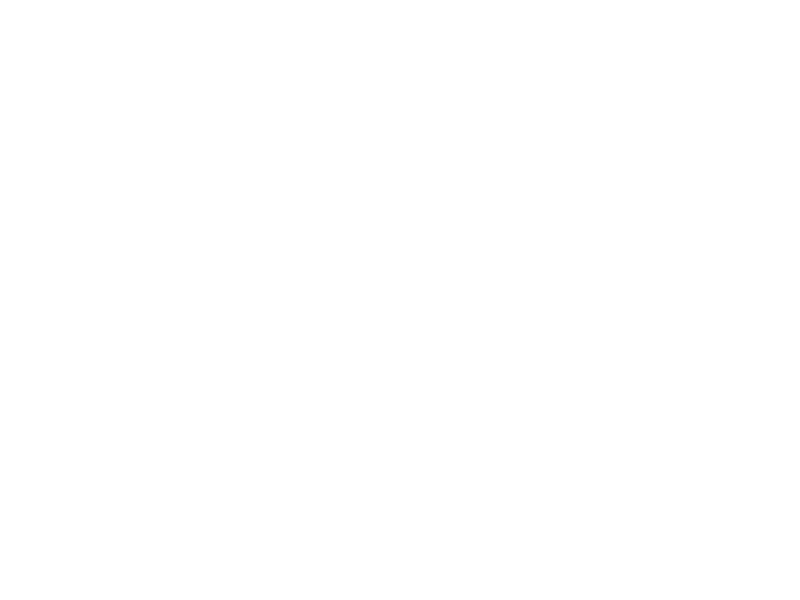

<IPython.core.display.Javascript object>


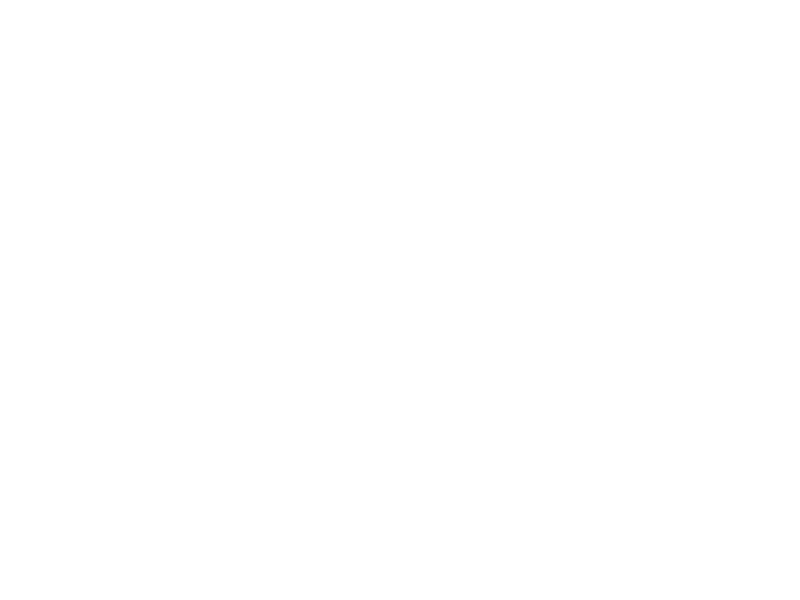

probKNNkdwd


<IPython.core.display.Javascript object>


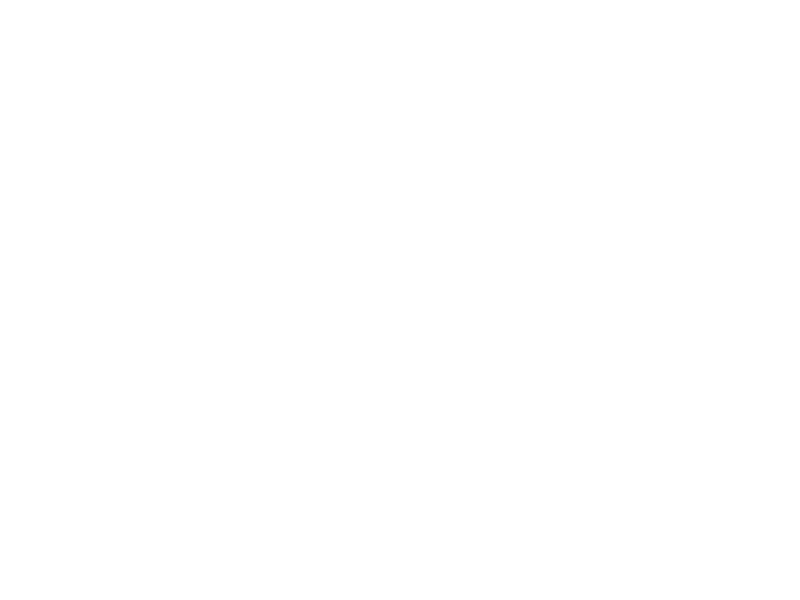

<IPython.core.display.Javascript object>


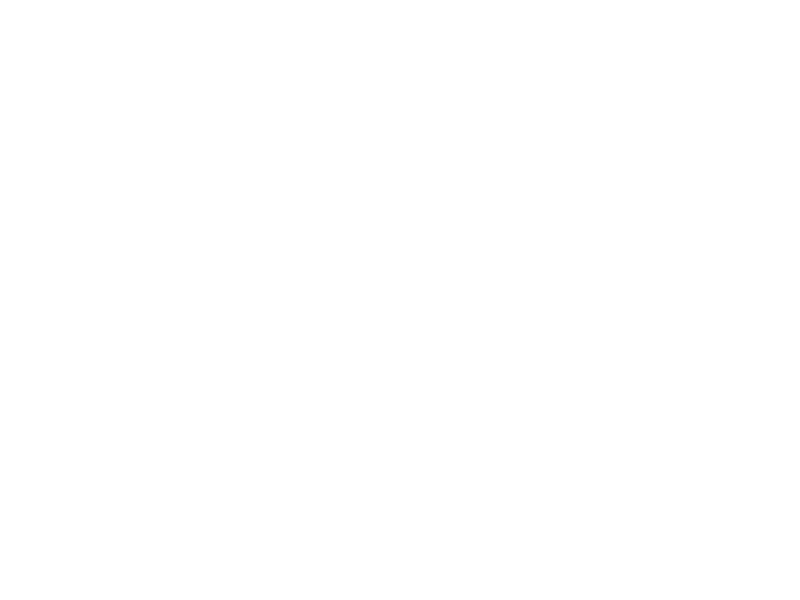

probKNNbrtwd


<IPython.core.display.Javascript object>


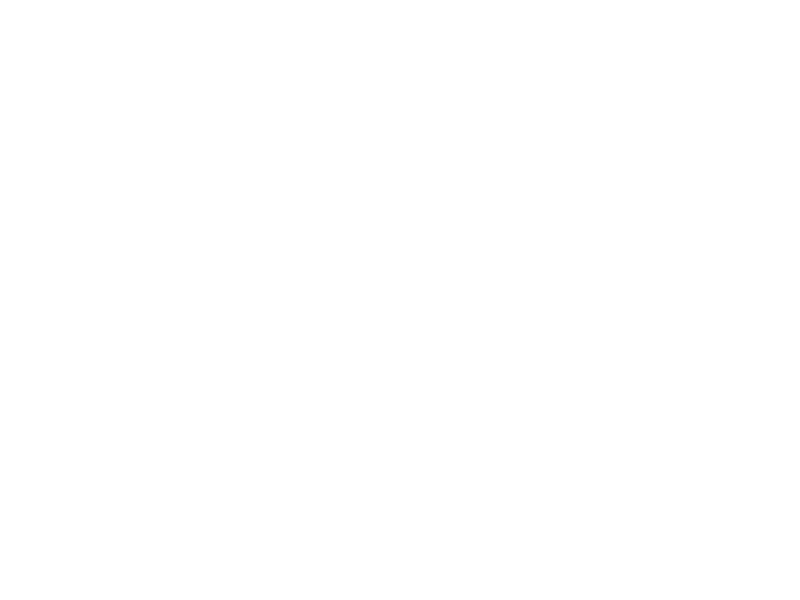

<IPython.core.display.Javascript object>


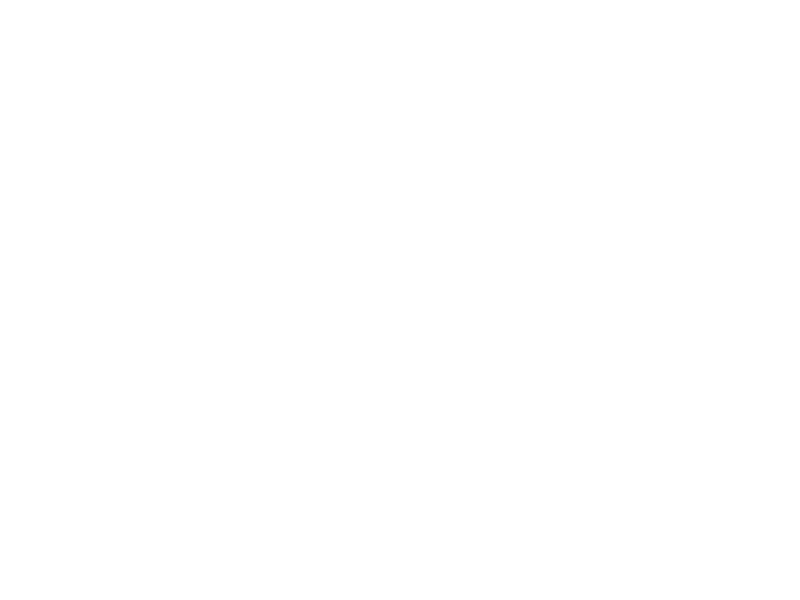

In [54]:

n_classes = 2
probs_names=["problr","probsvc","probsvcl","probsvcp","probsvcp2","probsvcs","probclf","probclfe","probKNNbt","probKNNkd","probKNNbrt","probKNNbtwd","probKNNkdwd","probKNNbrtwd"]

for i in range (len(probs_list)):
    print(probs_names[i])
    compute_precision_recall(probs_list[i])
    compute_ROC(probs_list[i])


Com la sigmoid dona pitjors resultats, vidualitzem la confusion matrix

In [55]:
def visualize_confusion_matrix(y_pred, y_real):
    # mostra la matriu de confusió
    cm = confusion_matrix(y_real, y_pred)
    plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Correct classification SVMS             0.5 % of the data:  0.8503740648379052
Correct classification SVMS             0.7 % of the data:  0.8547717842323651
Correct classification SVMS             0.8 % of the data:  0.906832298136646


<IPython.core.display.Javascript object>


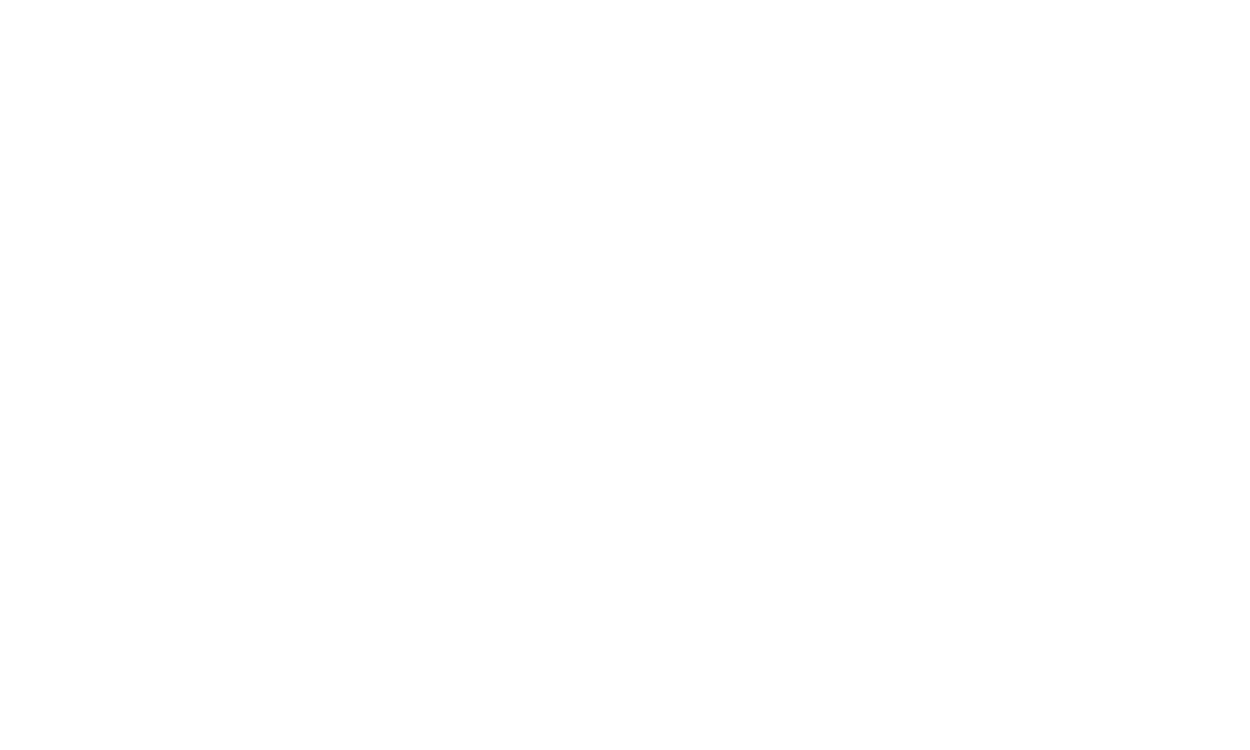

In [56]:
for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)
    svcs.fit(x_t, y_t)
    probsvcs = svcs.predict_proba(x_v)
    print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))
    if(part==0.8):
        visualize_confusion_matrix(svcs.predict(x_v), y_v)
    

Apliquem Cross-Validation al RandomForest

In [57]:

x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=0.8)
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

scores = cross_val_score(pipeline, X=X_train_selected, y=Y_train, cv=50, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [1.         1.         1.         1.         1.         0.92307692
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.92307692 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
Cross Validation accuracy: 0.997 +/- 0.015


A més del feature selection, també podem fer servir un PCA

In [58]:
dataset_x = dataset.drop(columns='is_legendary')
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(dataset_x)
pca = PCA(n_components = 2)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
df = pd.DataFrame(reduced, columns = ['pc1','pc2'])
df['is_legendary']=dataset['is_legendary']
df.head()

,pc1,pc2,is_legendary
0,-0.212,-0.123,0
1,-0.110,-0.009,0
2,0.168,0.283,0
3,-0.205,-0.061,0
4,-0.092,0.065,0


<IPython.core.display.Javascript object>


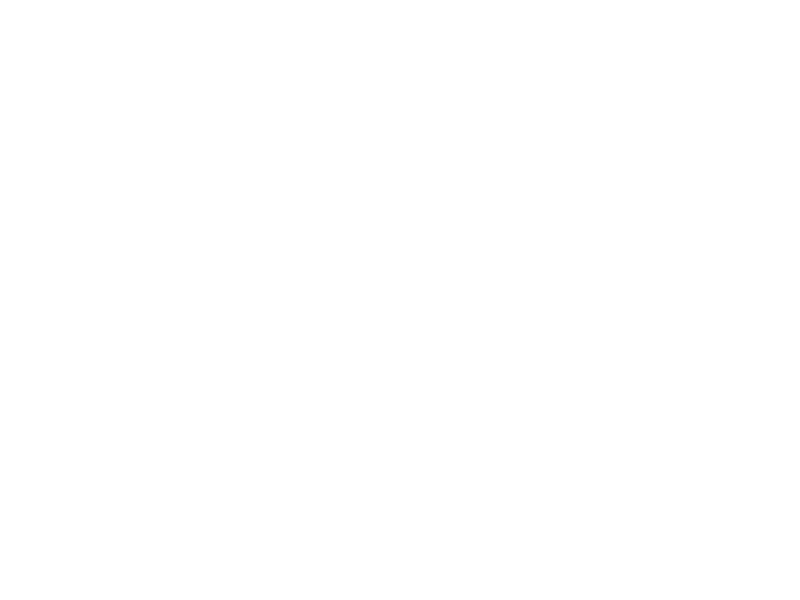

In [59]:
correlacio =df.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.25)
plt.show()

In [60]:
X=df.drop(["is_legendary"],axis=1)
y=df.filter(["is_legendary"])

particions = [0.5, 0.7, 0.8]
apply_models(particions,X,y)


Correct classification Logistic         0.5 % of the data:  0.9625935162094763
Correct classification SVM              0.5 % of the data:  0.9650872817955112
Correct classification SVML             0.5 % of the data:  0.9675810473815462
Correct classification SVMP deg3        0.5 % of the data:  0.9625935162094763
Correct classification SVMP deg2        0.5 % of the data:  0.942643391521197
Correct classification SVMS             0.5 % of the data:  0.9600997506234414
Correct classification RFC              0.5 % of the data:  0.912718204488778
Correct classification RFC etpy         0.5 % of the data:  0.9750623441396509
Correct classification KNN BT           0.5 % of the data:  0.9775561097256857
Correct classification KNN KD           0.5 % of the data:  0.9775561097256857
Correct classification KNN BRT          0.5 % of the data:  0.9775561097256857
Correct classification KNN BT wd=d      0.5 % of the data:  0.970074812967581
Correct classification KNN KD wd=d      0.5 % of the da

In [61]:
X=df.drop(["is_legendary"],axis=1)
y=df.filter(["is_legendary"]).values.ravel()
names=X.columns
show_C_effect(X.values,y,names,C=2)

<IPython.core.display.Javascript object>

Apliquem Plolynomial features

In [62]:
poly = PolynomialFeatures(2)
X_poly_2=poly.fit_transform(X)
poly = PolynomialFeatures(interaction_only=True)
X_poly_inter=poly.fit_transform(X)

Models fent servir les dades al quadrat

In [63]:
apply_models(particions,X_poly_2,y)


Correct classification Logistic         0.5 % of the data:  0.9476309226932669
Correct classification SVM              0.5 % of the data:  0.9451371571072319
Correct classification SVML             0.5 % of the data:  0.9476309226932669
Correct classification SVMP deg3        0.5 % of the data:  0.9451371571072319
Correct classification SVMP deg2        0.5 % of the data:  0.9476309226932669
Correct classification SVMS             0.5 % of the data:  0.912718204488778
Correct classification RFC              0.5 % of the data:  0.9301745635910225
Correct classification RFC etpy         0.5 % of the data:  0.9476309226932669
Correct classification KNN BT           0.5 % of the data:  0.9551122194513716
Correct classification KNN KD           0.5 % of the data:  0.9551122194513716
Correct classification KNN BRT          0.5 % of the data:  0.9551122194513716
Correct classification KNN BT wd=d      0.5 % of the data:  0.9576059850374065
Correct classification KNN KD wd=d      0.5 % of the 

Models fent servir la combinació lineal de les dades

In [64]:
x_t,x_v,t_t,t_v = train_test_split(X_poly_inter, y, test_size=0.2)
particions = [0.5, 0.7, 0.8]
apply_models(particions,X_poly_inter,y)

Correct classification Logistic         0.5 % of the data:  0.9775561097256857
Correct classification SVM              0.5 % of the data:  0.970074812967581
Correct classification SVML             0.5 % of the data:  0.972568578553616
Correct classification SVMP deg3        0.5 % of the data:  0.9675810473815462
Correct classification SVMP deg2        0.5 % of the data:  0.970074812967581
Correct classification SVMS             0.5 % of the data:  0.9451371571072319
Correct classification RFC              0.5 % of the data:  0.970074812967581
Correct classification RFC etpy         0.5 % of the data:  0.972568578553616
Correct classification KNN BT           0.5 % of the data:  0.9775561097256857
Correct classification KNN KD           0.5 % of the data:  0.9775561097256857
Correct classification KNN BRT          0.5 % of the data:  0.9775561097256857
Correct classification KNN BT wd=d      0.5 % of the data:  0.972568578553616
Correct classification KNN KD wd=d      0.5 % of the data:

Apliquem leaveOneOut

In [65]:
def func_LeaveOneOut(X,y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    accuracy=0
    for train_index, test_index in loo.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
        logireg.fit(X_train, y_train)
        problr = logireg.predict_proba(X_test)
        accuracy+=logireg.score(X_test, y_test)
        #print(X_train, X_test, y_train, y_test)
    print("Accuracy LeaveOneOut:",accuracy/len(y))

Per a totes les dades

In [66]:
y = dataset.filter(['is_legendary'])
X =dataset.drop(['is_legendary'],axis=1)
X=(X-X.mean())/X.std()
X=X.values
y=y.values
func_LeaveOneOut(X,y)

Accuracy LeaveOneOut: 0.9837702871410736


Per les dades havent aplicat Feature Selection

In [67]:
X=x_selected
y=y_selected
func_LeaveOneOut(X,y)

Accuracy LeaveOneOut: 0.9850187265917603


Hyperparameters

Per al regressor Logistic

In [68]:
x_t,x_v,y_t,y_v = train_test_split(x_selected, y_selected, test_size=0.2)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# define search space
model = LogisticRegression()
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l2']
space['C'] = loguniform.rvs(1e-5, 100,size=100)
# define search
start_time = time.time()
clf =  GridSearchCV(model, space,  n_jobs=-1, cv=cv)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Grid search')
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l2']
space['C'] = loguniform.rvs(1e-5, 100,size=10000)
start_time = time.time()
search = RandomizedSearchCV(model, space, n_iter=500, n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(x_t, y_t)
# summarize result
print('Random search')
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

Grid search
Best solver: newton-cg
Best penalty: l2
Best C: 0.08019700581612729
R^2 at best_score: 0.9875776397515528
--- 10.281576871871948 seconds ---
Random search
Best solver: newton-cg
Best penalty: l2
Best C: 0.08019700581612729
R^2 at best_score: 0.9875776397515528
--- 13.434151649475098 seconds ---


Per al KNN

In [69]:
x_t,x_v,y_t,y_v = train_test_split(x_selected, y_selected, test_size=0.2)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
start_time = time.time()
clf = GridSearchCV(knn_2, hyperparameters, cv=cv,n_jobs=-1)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Grid search')
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, n_jobs=-1, cv=cv)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Random search')
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))


Grid search
Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
R^2 at best_score: 0.9813664596273292
--- 70.20184206962585 seconds ---
Random search
Best leaf_size: 39
Best p: 2
Best n_neighbors: 1
R^2 at best_score: 0.9813664596273292
--- 12.834734201431274 seconds ---


Par al Random forest

In [71]:

# Number of trees in random forest
x_t,x_v,y_t,y_v = train_test_split(x_selected, y_selected, test_size=0.2)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1100, num = 5)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# Maximum number of levels in tree
max_depth =[5] #[int(x) for x in np.linspace(0, 10, 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
R_f=RandomForestClassifier()
start_time = time.time()
clf =GridSearchCV(R_f, random_grid,n_jobs=-1, cv=cv)
best_model = clf.fit(x_t,y_t)
print('Grid search')
print('Best number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1100, num = 1100)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
# Maximum number of levels in tree
max_depth =[int(x) for x in np.linspace(1, 5, 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(range(2,11))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,5))
# Method of selecting samples for training each tree
bootstrap = [True, False]
start_time = time.time()
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clf =  RandomizedSearchCV(R_f, random_grid, n_iter=80, n_jobs=-1, cv=cv)
#Fit the model
best_model = clf.fit(x_t,y_t)
#Print The value of best Hyperparameters
print('Random search')
print('Best number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
print('R^2 at best_score:',best_model.score(x_v,y_v))
print("--- %s seconds ---" % (time.time() - start_time))

Grid search
Best number of estimators: 100
Best max_depth: 5
Bootstrap: True
R^2 at best_score: 1.0
--- 345.74702644348145 seconds ---
Random search
Best number of estimators: 1089
Best max_depth: None
Bootstrap: False
R^2 at best_score: 0.9875776397515528
--- 345.5758833885193 seconds ---
